# Imports

In [22]:
import pandas as pd
from translate import Translator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature Translation and Dataset Processing
This code processes accident datasets by translating Hebrew feature names to English using a predefined dictionary and Google Translate for unmatched features. It normalizes column names, loads the dataset, applies translations, and displays the number of non-empty rows and translated features. Finally, it outputs the fully translated and processed dataset.

In [23]:
feature_translation_dict = {
    'תחום גאוגרפי': 'Geographic area',
    'סוג דרך': 'Road type',
    'סמל ישוב': 'Settlement code',
    'רחוב 1': 'Street 1',
    'רחוב 2': 'Street 2',
    'צומת עירוני': 'Urban intersection',
    'דרך לא עירונית 1': 'Non-urban road 1',
    'דרך לא עירונית 2': 'Non-urban road 2',
    'קמ': 'Kilometer',
    'צומת לא עירוני': 'Non-urban intersection',
    'יחידה משטרתית': 'Police unit',
    'חודש תאונה': 'Accident month',
    'שעה': 'Hour',
    'סוג יום': 'Day type',
    'יום/לילה': 'Day/night',
    'יום בשבוע': 'Day in the week',
    'חומרת התאונה': 'Accident severity',
    'סוג תאונה': 'Accident type',
    'דרך חד מסלולית (חלופה לדרך רב מסלולית)': 'Single-lane road',
    'דרך רב מסלולית (חלופה לדרך חד מסלולית)': 'Multi-lane road',
    'מהירות מותרת': 'Speed limit',
    'תקינות הדרך': 'Road condition',
    'רוחב הכביש': 'Road width',
    'סימון/תימרור': 'Signs/markings',
    'תאורה': 'Lighting',
    'מזג אויר': 'Weather',
    'מצב פני הכביש': 'Road surface condition',
    'סוג העצם (רק בסוג תאונה 8)': 'Object type (accident type 8 only)',
    'מרחק העצם (רק בסוג תאונה 8)': 'Object distance (accident type 8 only)',
    'לא חצה (רק בסוג תאונה1, חלופה לאופן חצייה)': 'Did not cross (accident type 1 only)',
    'אופן חציה (רק בסוג תאונה1, חלופה ללא חצה)': 'Crossing method (accident type 1 only)',
    'מקום חציה (רק בסוג תאונה 1)': 'Crossing location (accident type 1 only)',
    'כיוון חציה (רק בסוג תאונה 1)': 'Crossing direction (accident type 1 only)',
    'מחוז (רק בסוג דרך 1,2)': 'District (road type 1,2)',
    'נפה (רק בסוג דרך 1,2)': 'Region (road type 1,2)',
    'אזור טבעי (רק בסוג דרך 1,2)': 'Natural area (road type 1,2)',
    'מעמד מוניצפלי (רק בסוג דרך 1,2)': 'Municipal status (road type 1,2)',
    'צורת ישוב (רק בסוג דרך 1,2)': 'Settlement type (road type 1,2)',
    # Adding translations for unmatched features
    'pk_teuna_fikt': 'Accident ID',
    'sug_tik': 'Case type',
    'BAYIT': 'House number',
    'SHNAT_TEUNA': 'Accident year',
    'STATUS_IGUN': 'Location status',
    'X': 'Longitude',
    'Y': 'Latitude',
}

# Translation functions

In [24]:
# Function to normalize strings for consistent matching
def normalize_string(s):
    return s.strip().lower() if isinstance(s, str) else s

# Function to translate words to English using Google Translator

translator = Translator(to_lang="en", from_lang="he")

def translate_to_english(word):
    try:
        return translator.translate(word)
    except Exception as e:
        print(f"Error translating '{word}': {e}")
        return word
# Function to process, translate, and display the dataset info
def process_and_translate(file_path, dictionary_path):
    """
    Processes a dataset by loading it, translating its features to English,
    and printing the number of non-empty rows and a list of features in English.
    """
    # Load the dataset
    data = pd.read_csv(file_path)

    # Normalize column names in the dataset
    data.columns = [normalize_string(col) for col in data.columns]

    # Load the translation dictionary from the Excel file
    dictionary_df = pd.read_excel(dictionary_path, sheet_name='H20221041AccCodebook')
    translations = dictionary_df[['Unnamed: 3', 'Unnamed: 2']].dropna().rename(
        columns={'Unnamed: 3': 'Feature_Hebrew', 'Unnamed: 2': 'Feature_English'}
    )
    dynamic_translation_dict = dict(
        zip(
            [normalize_string(x) for x in translations['Feature_Hebrew']],
            translations['Feature_English']
        )
    )

    # Normalize keys in the predefined dictionary
    normalized_feature_translation_dict = {
        normalize_string(k): v for k, v in feature_translation_dict.items()
    }

    # Combine with the normalized dynamic dictionary
    combined_translation_dict = {**dynamic_translation_dict, **normalized_feature_translation_dict}

    # Debug: Check unmatched columns
    unmatched_features = [col for col in data.columns if col not in combined_translation_dict]
    print(f"Unmatched features (not in dictionary): {unmatched_features}")

    # Translate the dataset
    translated_data = data.rename(columns=lambda col: combined_translation_dict.get(normalize_string(col), f"Untranslated: {col}"))

    # Translate any remaining unmatched columns to English dynamically
    translated_data.columns = [translate_to_english(col) for col in translated_data.columns]

    # Count non-empty rows
    non_empty_rows = translated_data.dropna(how='all').shape[0]

    # Get translated features
    translated_features = translated_data.columns.tolist()

    # Print the results
    print(f"File: {file_path}")
    print(f"Number of non-empty rows: {non_empty_rows}")
    print("Features (columns) in English:")
    for feature in translated_features:
        print(f"- {feature}")
    print("\n")
    return translated_data


# Process files 2018-2022

Road accidents investigated by the police and collected by the Central Bureau of Statistics (CBS) (Extended Road Accidents Database) over the past five years. Mapped at a detailed level and at the level of kilometer markers, aggregated by traffic zones based on the National Transportation Model.

In [25]:
# File paths to datasets from 2018 to 2022
file_paths = {
    2018: './Datasets/data_accidents_israel_by_year/2018/2018_data.csv',
    2019: './Datasets/data_accidents_israel_by_year/2019/2019_data.csv',
    2020: './Datasets/data_accidents_israel_by_year/2020/2020_data.csv',
    2021: './Datasets/data_accidents_israel_by_year/2021/2021_data.csv',
    2022: './Datasets/data_accidents_israel_by_year/2022/2022_data.csv'
}

# Process files for 2018
file_path_2018 = './Datasets/Data_accidents_israel_by_year/2018/2018_data.csv'
dictionary_path_2018 = './Datasets/Data_accidents_israel_by_year/2018/data-dict-2018.xlsx'
translated_data_2018 = process_and_translate(file_path_2018, dictionary_path_2018)

# Process files for 2019
file_path_2019 = './Datasets/Data_accidents_israel_by_year/2019/2019_data.csv'
dictionary_path_2019 = './Datasets/Data_accidents_israel_by_year/2019/data-dict-2019.xlsx'
translated_data_2019 = process_and_translate(file_path_2019, dictionary_path_2019)

# Process files for 2020
file_path_2020 = './Datasets/Data_accidents_israel_by_year/2020/2020_data.csv'
dictionary_path_2020 = './Datasets/Data_accidents_israel_by_year/2020/data-dict-2020.xlsx'
translated_data_2020 = process_and_translate(file_path_2020, dictionary_path_2020)

# Process files for 2021
file_path_2021 = './Datasets/Data_accidents_israel_by_year/2021/2021_data.csv'
dictionary_path_2021 = './Datasets/Data_accidents_israel_by_year/2021/data-dict-2021.xlsx'
translated_data_2021 = process_and_translate(file_path_2021, dictionary_path_2021)

# Process files for 2022
file_path_2022 = './Datasets/Data_accidents_israel_by_year/2022/2022_data.csv'
dictionary_path_2022 = './Datasets/Data_accidents_israel_by_year/2022/data-dict-2022.xlsx'
translated_data_2022 = process_and_translate(file_path_2022, dictionary_path_2022)

Unmatched features (not in dictionary): []
File: ./Datasets/Data_accidents_israel_by_year/2018/2018_data.csv
Number of non-empty rows: 12596
Features (columns) in English:
- Accident ID
- Case type
- Geographical area
- Road type
- Symbol of the settlement:
- Street 1
- Street2
- House number
- City intersection
- Non-urban road 1
- Non-city road 2
- km
- Non-City Intersection
- Police Unit
- Accident year
- Accident Month
- per hour 
- Day Type
- Day/Night
- Day of the week
- Severity of accident
- Type of accident
- Single-lane road (alternative to a multi-lane road)
- Multi-orbital road (alternative to single-lane road)
- Identify speed limit
- Route integrity
- Road Width
- Marking/signposting
- Lighting system
- Weather
- Road surface status
- Bone type (only in accident type 8)
- Distance of the object (only in type of accident 8)
- Did not cross (only in type of accident1, alternative to crosswalk)
- Crossing mode (only in type of accident1, alternative without crossing)
- Cross

# Accident Data Aggregation and Visualization
This script loads and combines accident datasets from multiple years, mapping key features like day of the week, road type, and accident severity to readable labels. It then plots the distribution of these features to visualize accident trends and patterns across different categories.

Total number of non-empty rows in the combined dataset: 58060


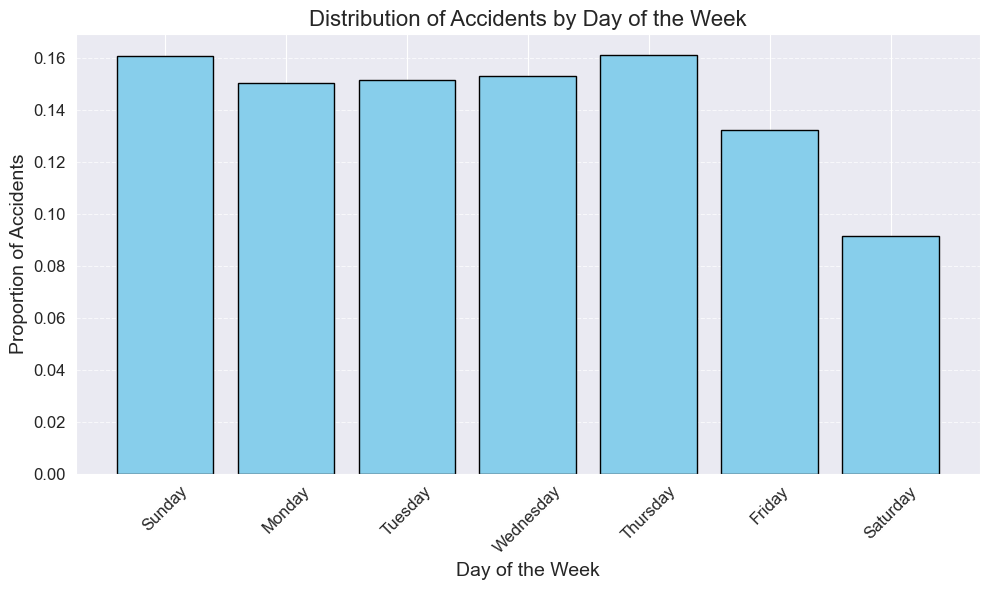

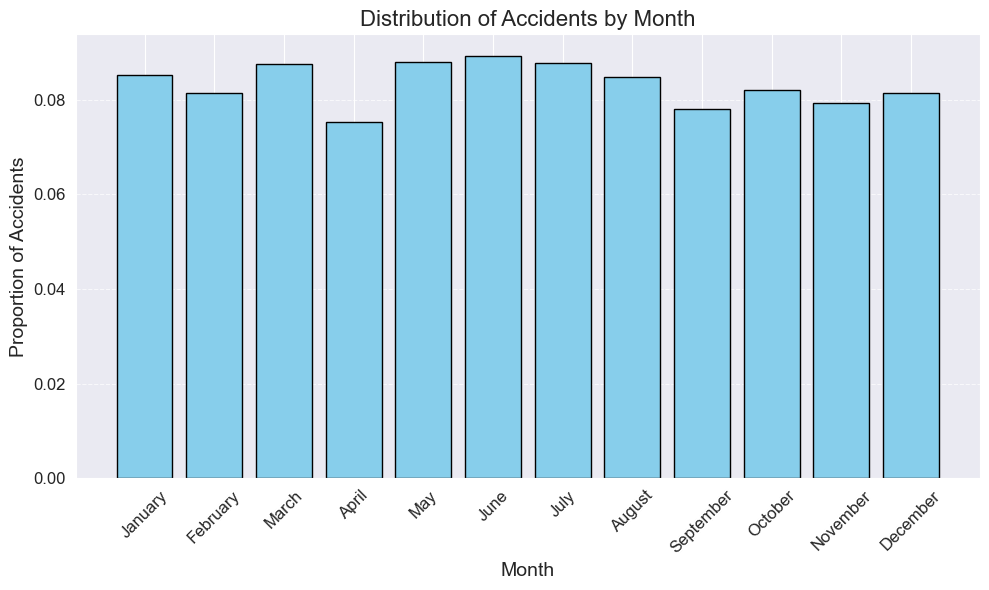

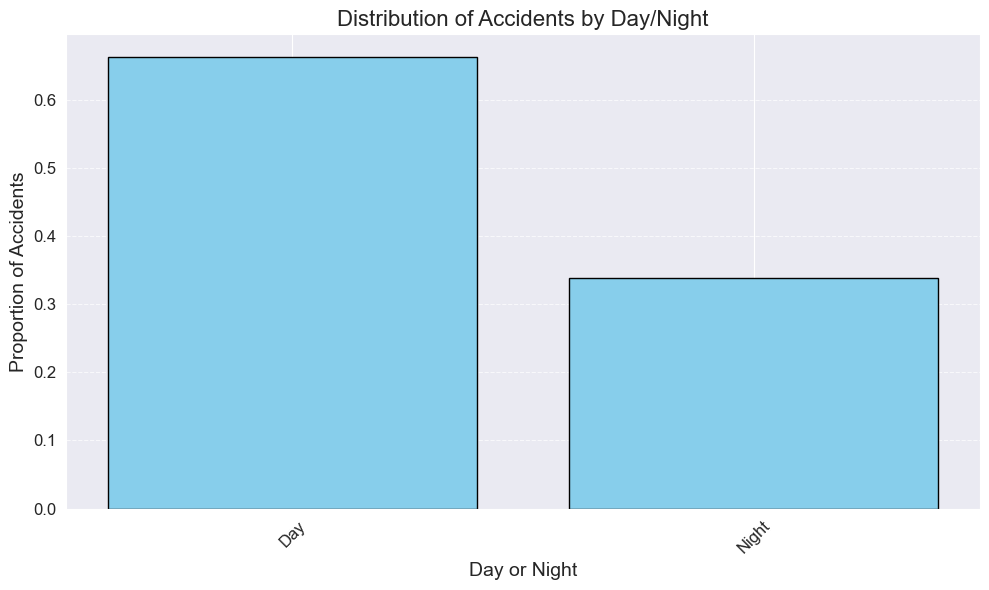

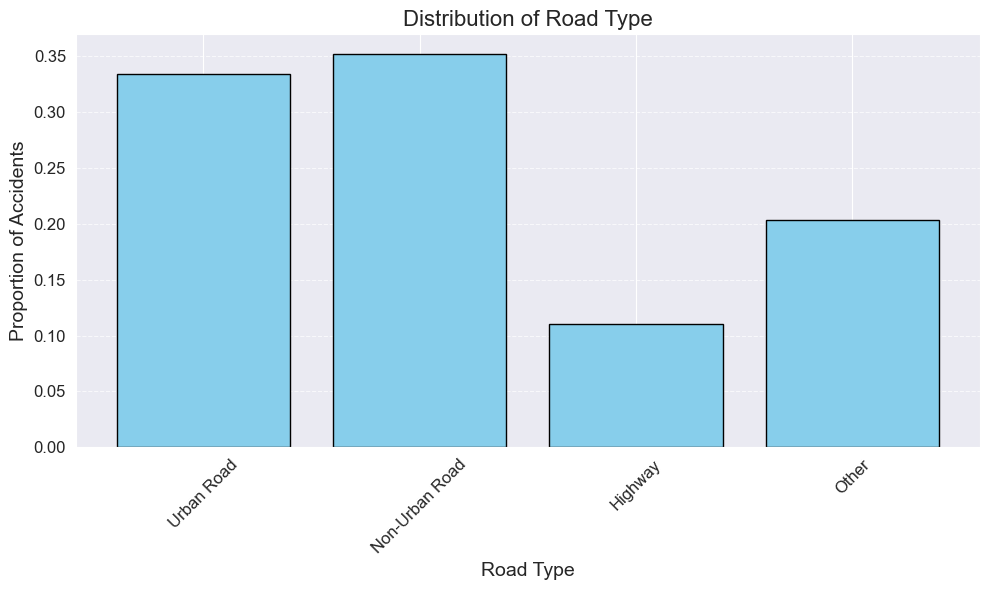

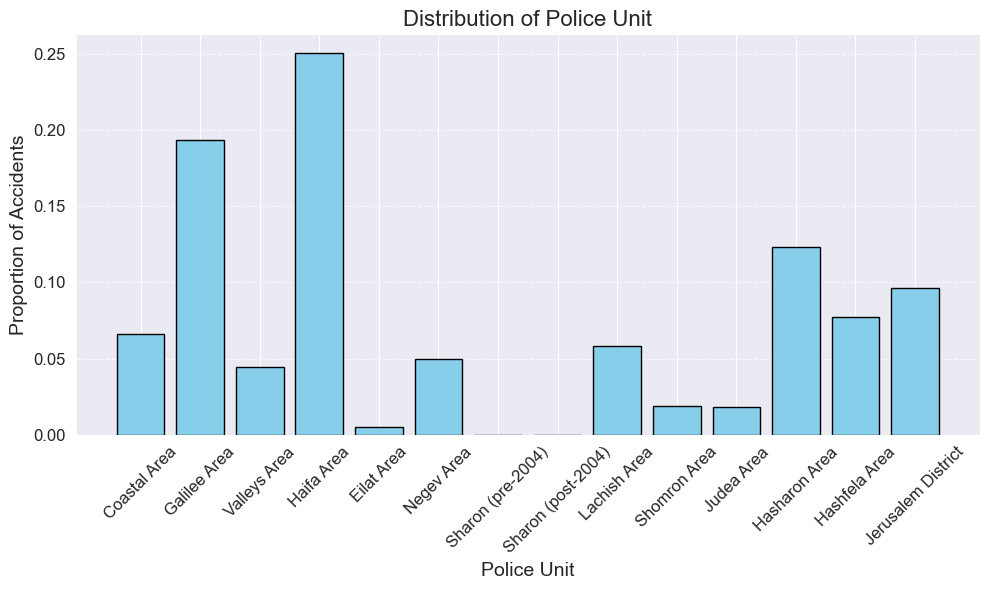

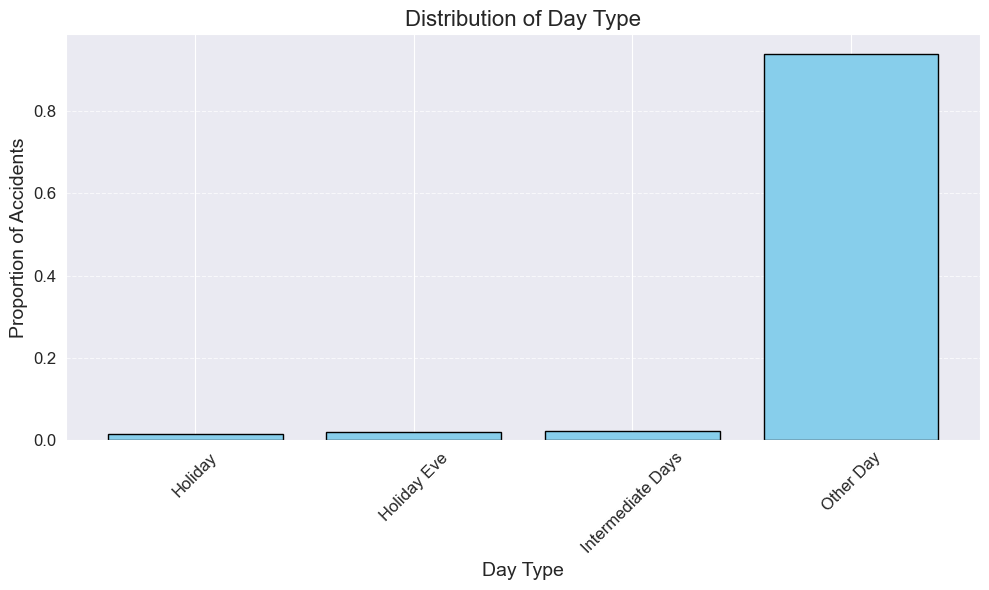

Field 'MERKAZI' is missing from the dataset. Skipping...


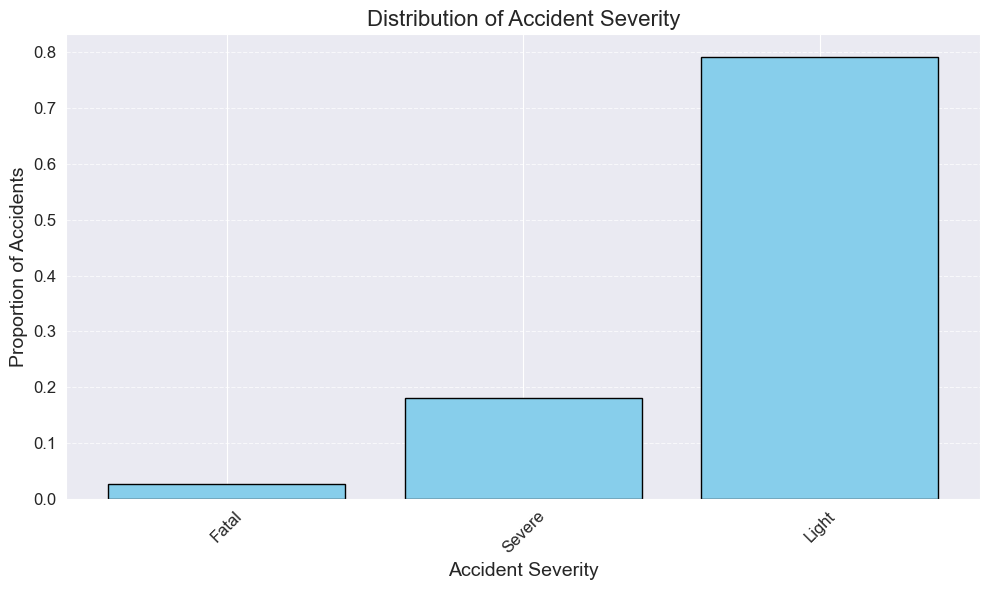

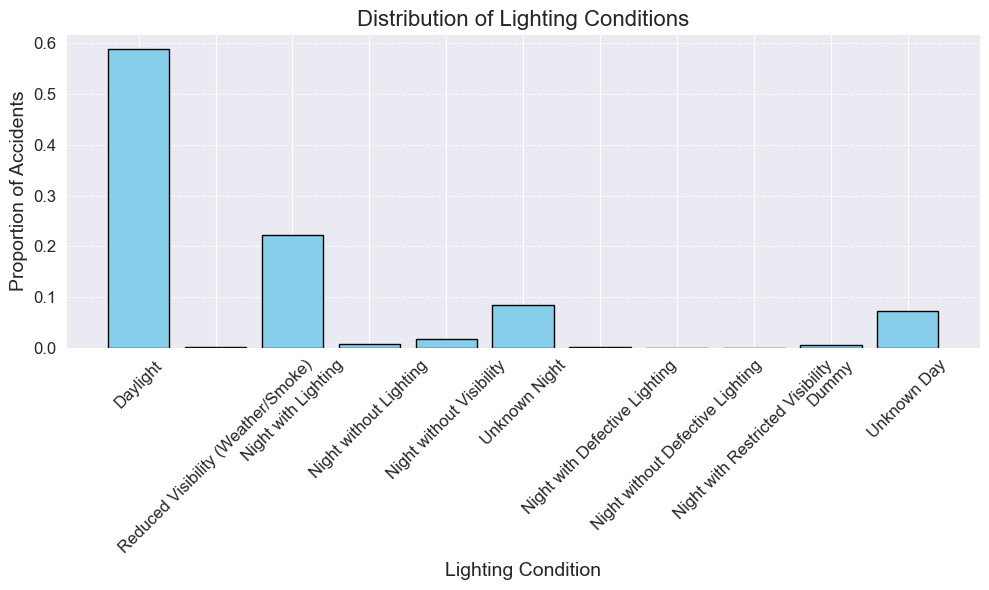

In [26]:
# List to hold data from all years
all_data = []

# Loop through each year and load the data
for year, path in file_paths.items():
    try:
        # Load the dataset
        data = pd.read_csv(path)
        # Add a column for the year to identify data
        data['Year'] = year
        # Append to the list
        all_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets
combined_data = pd.concat(all_data, ignore_index=True)

# Count non-empty rows
non_empty_rows = combined_data.dropna(how='all').shape[0]
print(f"Total number of non-empty rows in the combined dataset: {non_empty_rows}")

# Define mappings for fields
field_mappings = {
    'YOM_BASHAVUA': {
        'mapping': {
            1: "Sunday", 2: "Monday", 3: "Tuesday",
            4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
        },
        'title': 'Distribution of Accidents by Day of the Week',
        'xlabel': 'Day of the Week'
    },
    'HODESH_TEUNA': {
        'mapping': {
            1: "January", 2: "February", 3: "March", 4: "April",
            5: "May", 6: "June", 7: "July", 8: "August",
            9: "September", 10: "October", 11: "November", 12: "December"
        },
        'title': 'Distribution of Accidents by Month',
        'xlabel': 'Month'
    },
    'YOM_LAYLA': {
        'mapping': {
            1: "Day", 5: "Night"
        },
        'title': 'Distribution of Accidents by Day/Night',
        'xlabel': 'Day or Night'
    },
    'SUG_DEREH': {
        'mapping': {1: "Urban Road", 2: "Non-Urban Road", 3: "Highway", 4: "Other"},
        'title': 'Distribution of Road Type',
        'xlabel': 'Road Type'
    },
    'YEHIDA': {
        'mapping': {
            11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
            20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
            36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
            41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
            52: "Hashfela Area", 61: "Jerusalem District"
        },
        'title': 'Distribution of Police Unit',
        'xlabel': 'Police Unit'
    },
    'SUG_YOM': {
        'mapping': {
            1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Other Day"
        },
        'title': 'Distribution of Day Type',
        'xlabel': 'Day Type'
    },
    'MERKAZI': {
        'mapping': {1: "Signalized", 2: "Non-Signalized"},
        'title': 'Distribution of Signalized/Non-Signalized',
        'xlabel': 'Signalized/Non-Signalized'
    },
    'HUMRAT_TEUNA': {
        'mapping': {1: "Fatal", 2: "Severe", 3: "Light"},
        'title': 'Distribution of Accident Severity',
        'xlabel': 'Accident Severity'
    },
    'TEURA': {
        'mapping': {
            1: "Daylight", 2: "Reduced Visibility (Weather/Smoke)", 3: "Night with Lighting",
            4: "Night without Lighting", 5: "Night without Visibility", 6: "Unknown Night",
            7: "Night with Defective Lighting", 8: "Night without Defective Lighting",
            9: "Night with Restricted Visibility", 10: "Dummy", 11: "Unknown Day"
        },
        'title': 'Distribution of Lighting Conditions',
        'xlabel': 'Lighting Condition'
    }
}

# Analyze and plot distributions for each field
for field, details in field_mappings.items():
    # Check if the field exists in the data
    if field not in combined_data.columns:
        print(f"Field '{field}' is missing from the dataset. Skipping...")
        continue

    # Map field values to names
    combined_data[f'{field}_Name'] = combined_data[field].map(details['mapping'])

    # Count occurrences for each category
    field_counts = combined_data[f'{field}_Name'].value_counts().reindex(details['mapping'].values(), fill_value=0)

    # Normalize the values for distribution (0 to 1)
    field_distribution = field_counts / field_counts.sum()

    # Plot the distribution graph
    plt.figure(figsize=(10, 6))
    plt.bar(field_distribution.index, field_distribution.values, edgecolor='black', color='skyblue')
    plt.title(details['title'], fontsize=16)
    plt.xlabel(details['xlabel'], fontsize=14)
    plt.ylabel('Proportion of Accidents', fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the graph
    plt.show()

# Normalized Accident Probability by Day Type
This script maps SUG_YOM to readable day types, calculates their frequencies, and normalizes them based on annual proportions. Finally, it plots the relative probability of accidents for each day type.

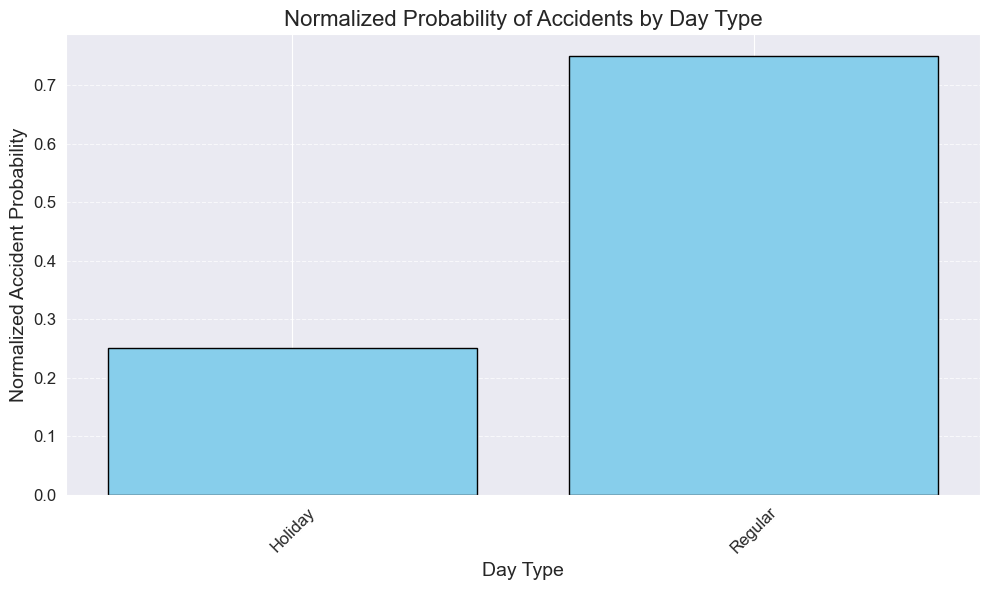

In [27]:
# Map `SUG_YOM` to readable labels
sug_yom_mapping = {
    1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Regular"
}
combined_data['SUG_YOM_Name'] = combined_data['SUG_YOM'].map(sug_yom_mapping)

# Day type proportions based on provided statistics
day_type_distribution = {
    "Holiday": 0.05,  # 05% of the year
    "Regular": 0.95   # 95% of the year
}

# Count occurrences for each day type
day_type_counts = combined_data['SUG_YOM_Name'].value_counts().reindex(day_type_distribution.keys(), fill_value=0)

# Normalize the counts by day type proportion
normalized_day_type_counts = day_type_counts / pd.Series(day_type_distribution)

# Normalize to probabilities (between 0 and 1)
final_normalized_proportions = normalized_day_type_counts / normalized_day_type_counts.sum()

# Plot the normalized graph
plt.figure(figsize=(10, 6))
plt.bar(final_normalized_proportions.index, final_normalized_proportions.values, edgecolor='black', color='skyblue')
plt.title("Normalized Probability of Accidents by Day Type", fontsize=16)
plt.xlabel("Day Type", fontsize=14)
plt.ylabel("Normalized Accident Probability", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the graph
plt.show()

# Heatmap of Accidents by Day of the Week and Police Unit
This script maps days of the week and police units to readable labels, then generates a heatmap to visualize the distribution of accidents across different days and police regions. The heatmap highlights where and when accidents are most frequent.

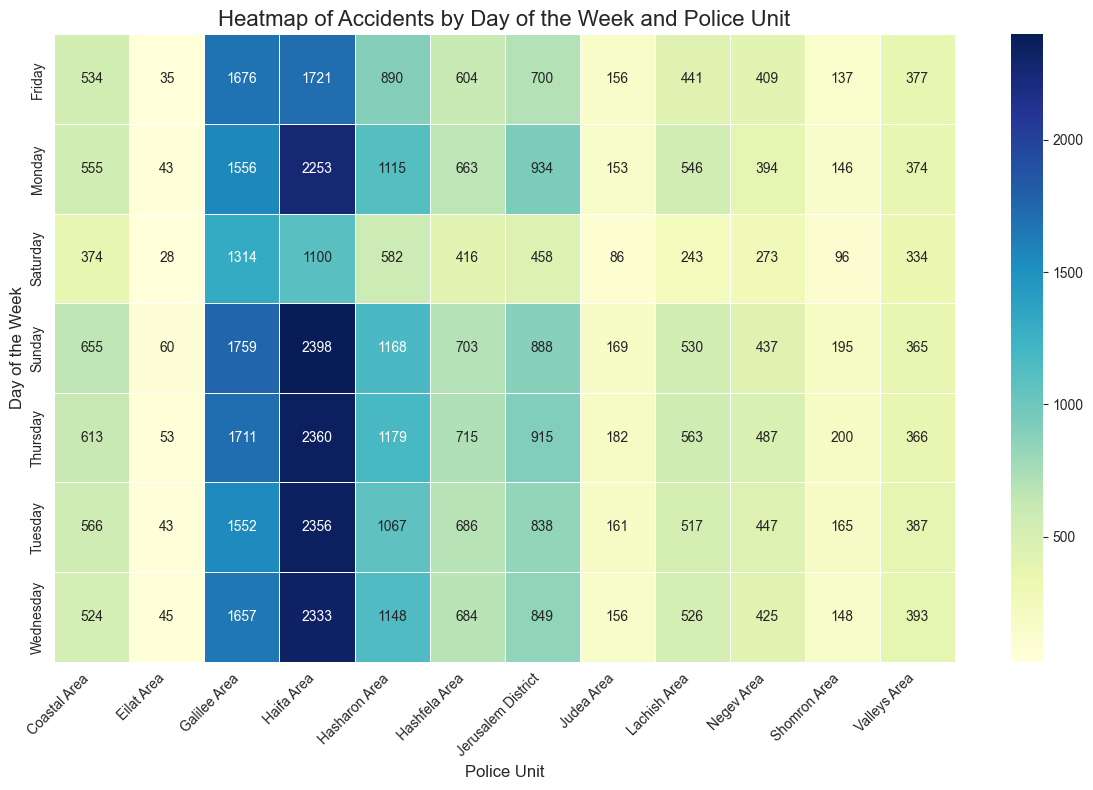

In [28]:

# Mapping for days of the week (YOM_BASHAVUA)
day_mapping = {
    1: "Sunday", 2: "Monday", 3: "Tuesday",
    4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"
}

# Mapping for Police Unit (YEHIDA)
yehida_mapping = {
    11: "Coastal Area", 12: "Galilee Area", 14: "Valleys Area",
    20: "Haifa Area", 33: "Eilat Area", 34: "Negev Area",
    36: "Sharon (pre-2004)", 37: "Sharon (post-2004)", 38: "Lachish Area",
    41: "Shomron Area", 43: "Judea Area", 51: "Hasharon Area",
    52: "Hashfela Area", 61: "Jerusalem District"
}

# Filter relevant columns
heatmap_data = combined_data[['YOM_BASHAVUA', 'YEHIDA']].dropna()

# Map the values to their names
heatmap_data['YOM_BASHAVUA'] = heatmap_data['YOM_BASHAVUA'].map(day_mapping)
heatmap_data['YEHIDA'] = heatmap_data['YEHIDA'].map(yehida_mapping)

# Create a pivot table for the heatmap
pivot_table = heatmap_data.groupby(['YOM_BASHAVUA', 'YEHIDA']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Accidents by Day of the Week and Police Unit", fontsize=16)
plt.xlabel("Police Unit", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


# Feature Mapping and Heatmap Visualization
This script maps raw dataset values to readable labels and generates heatmaps to visualize relationships between features like road type, accident severity, and weather conditions, revealing patterns in accident data.

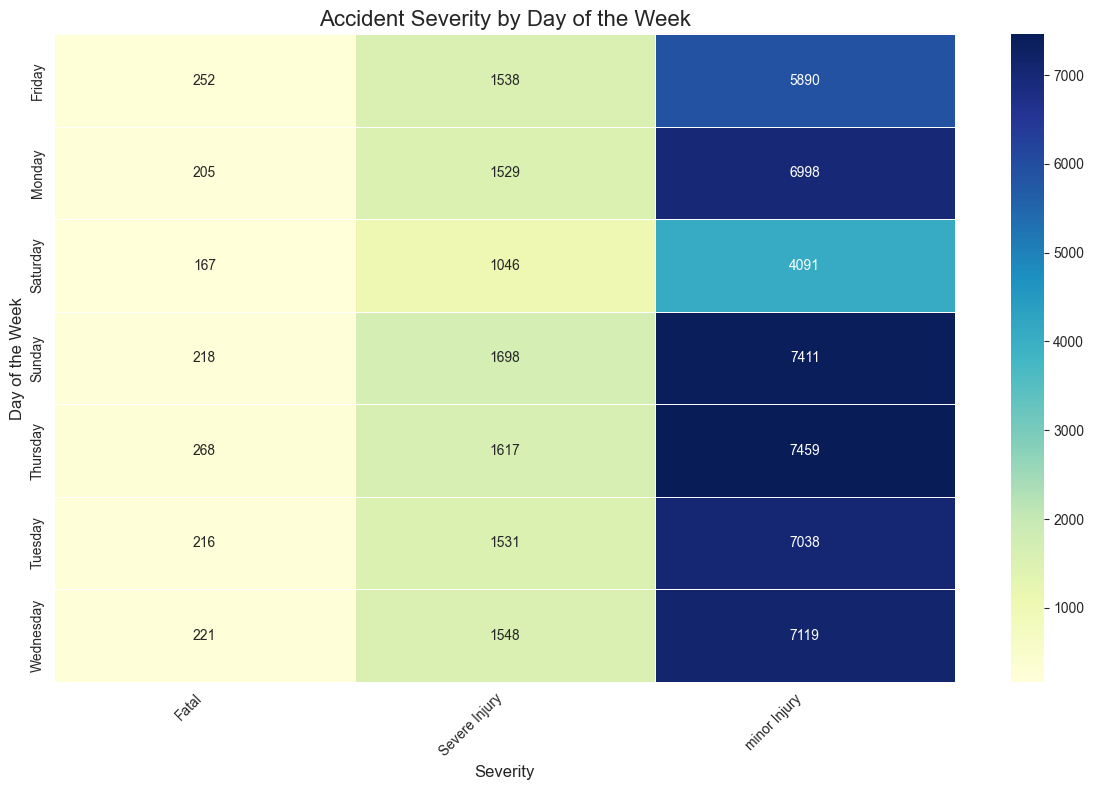

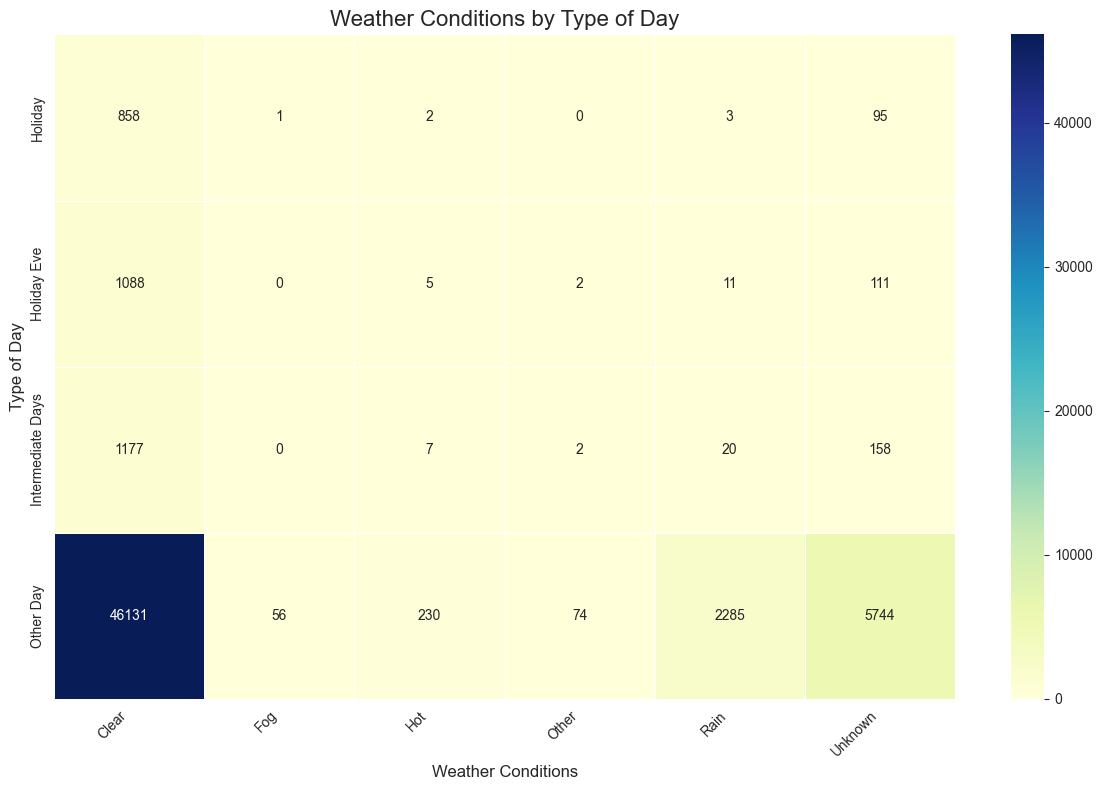

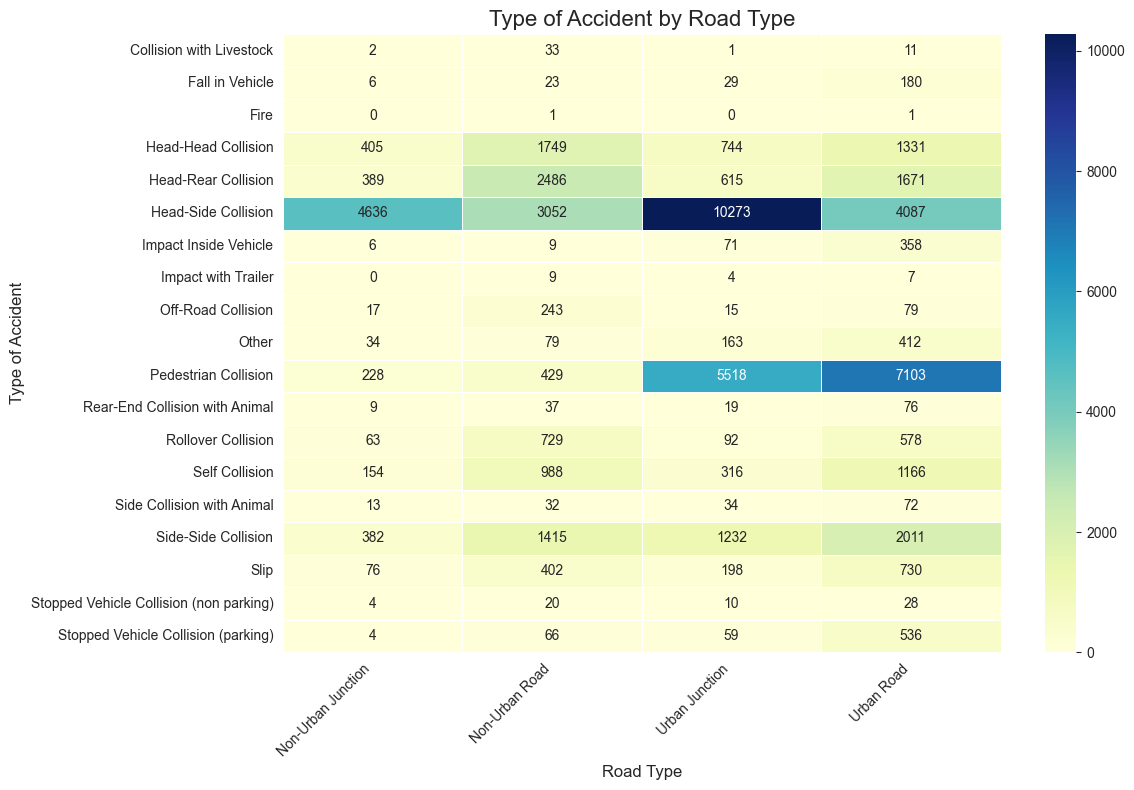

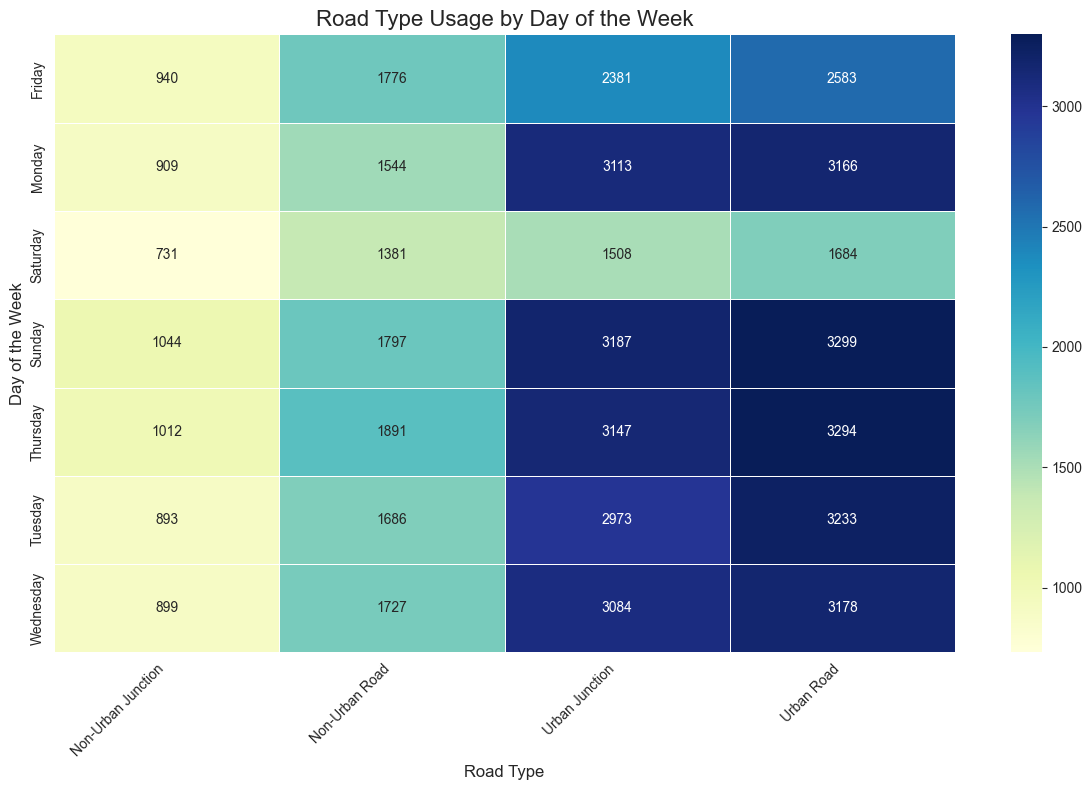

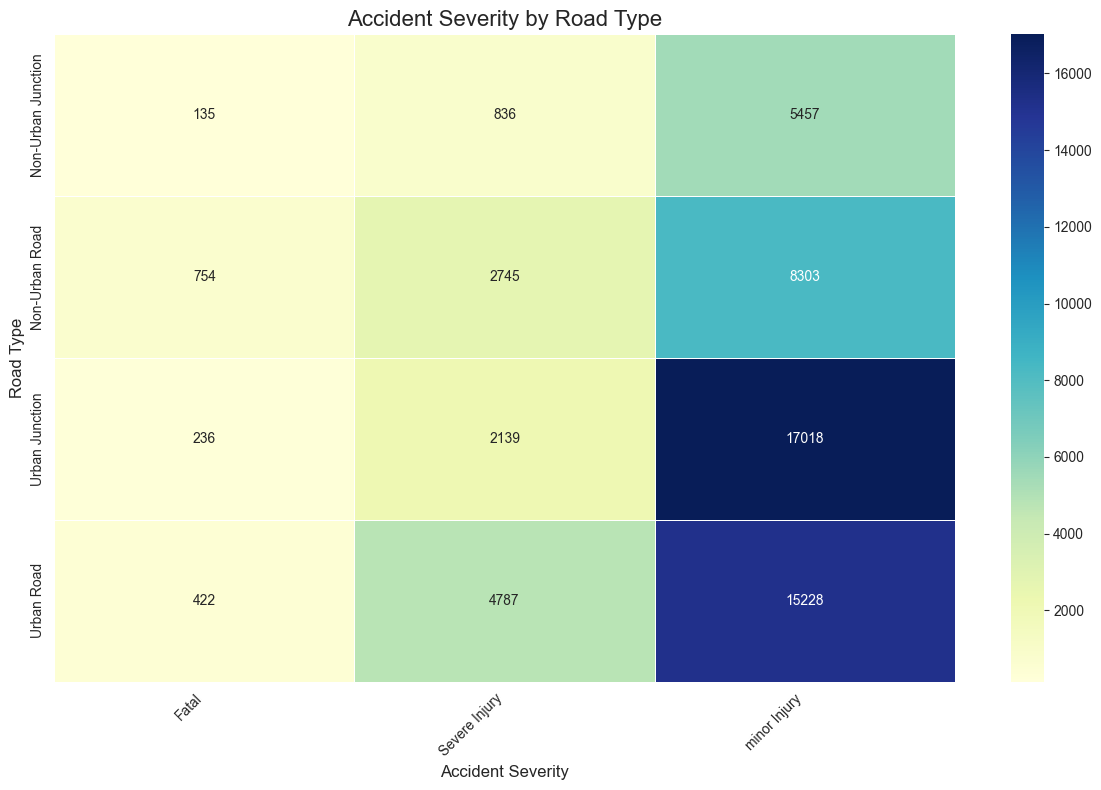

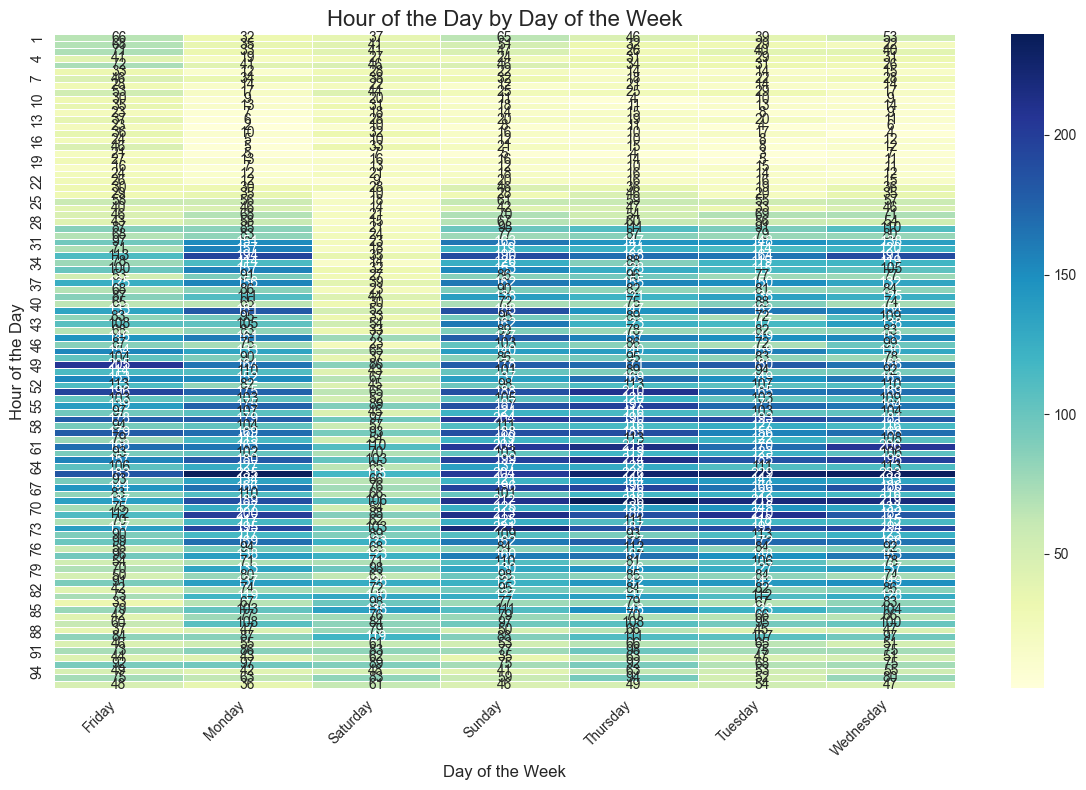

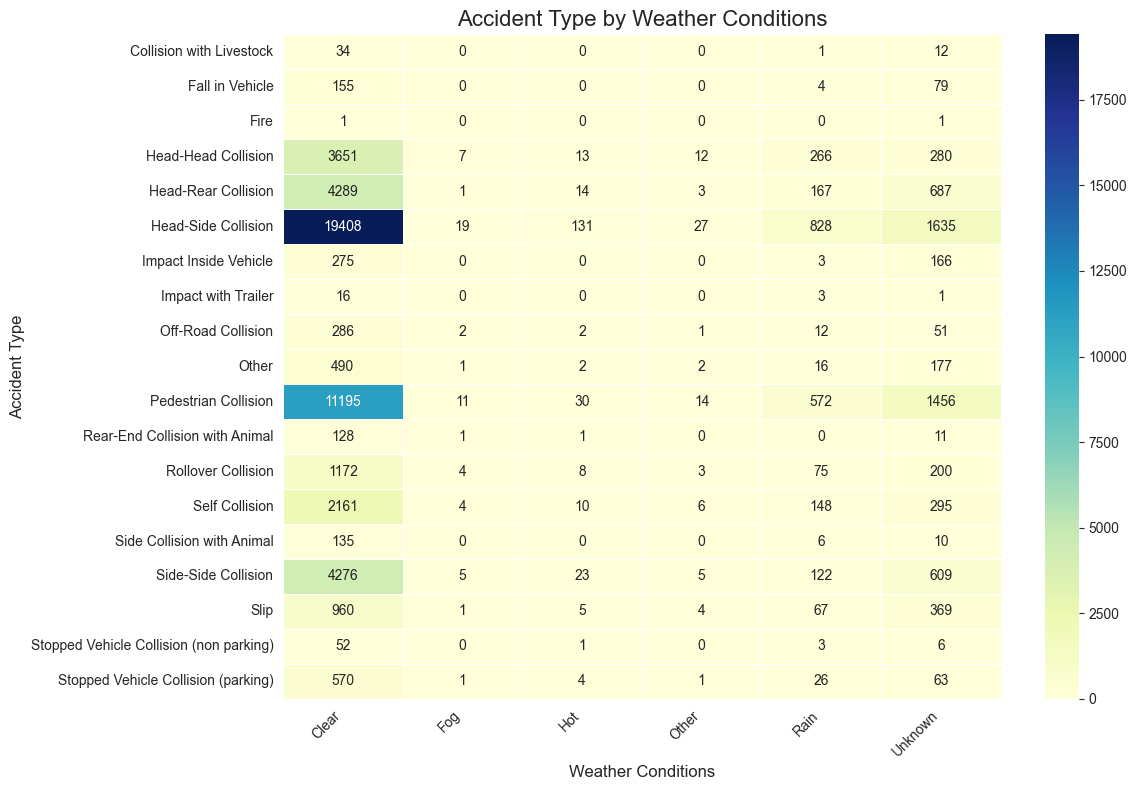

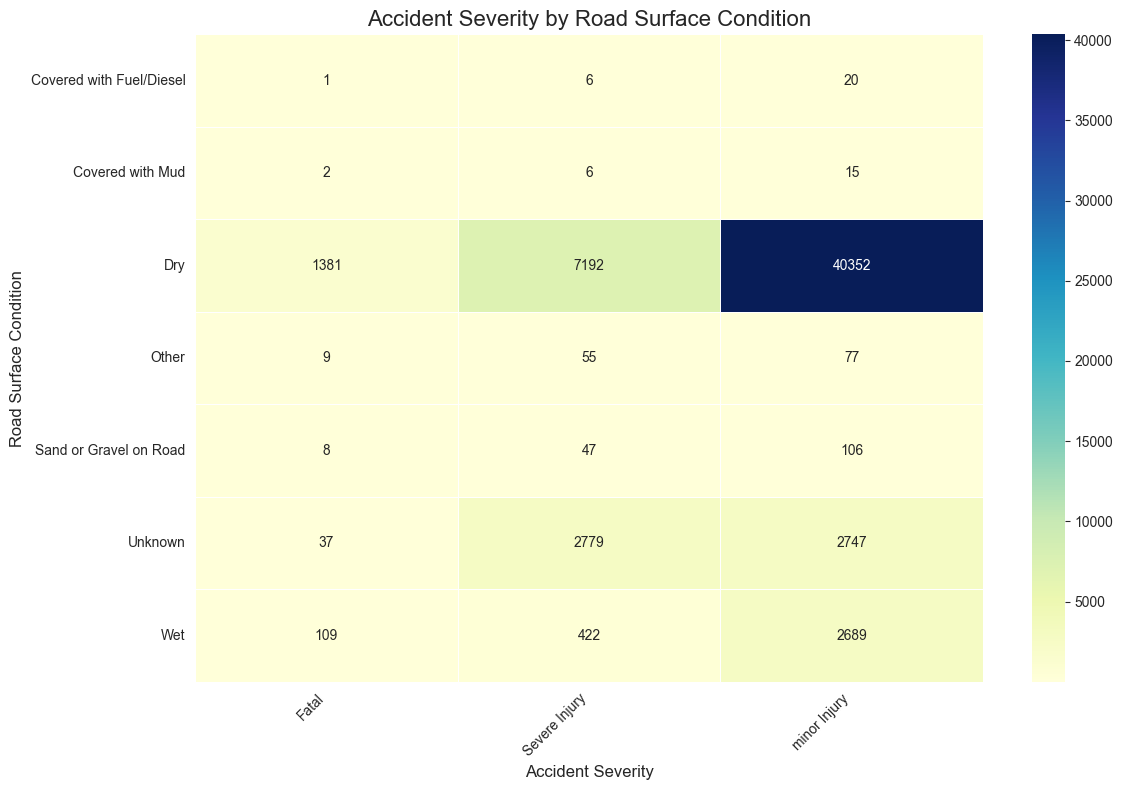

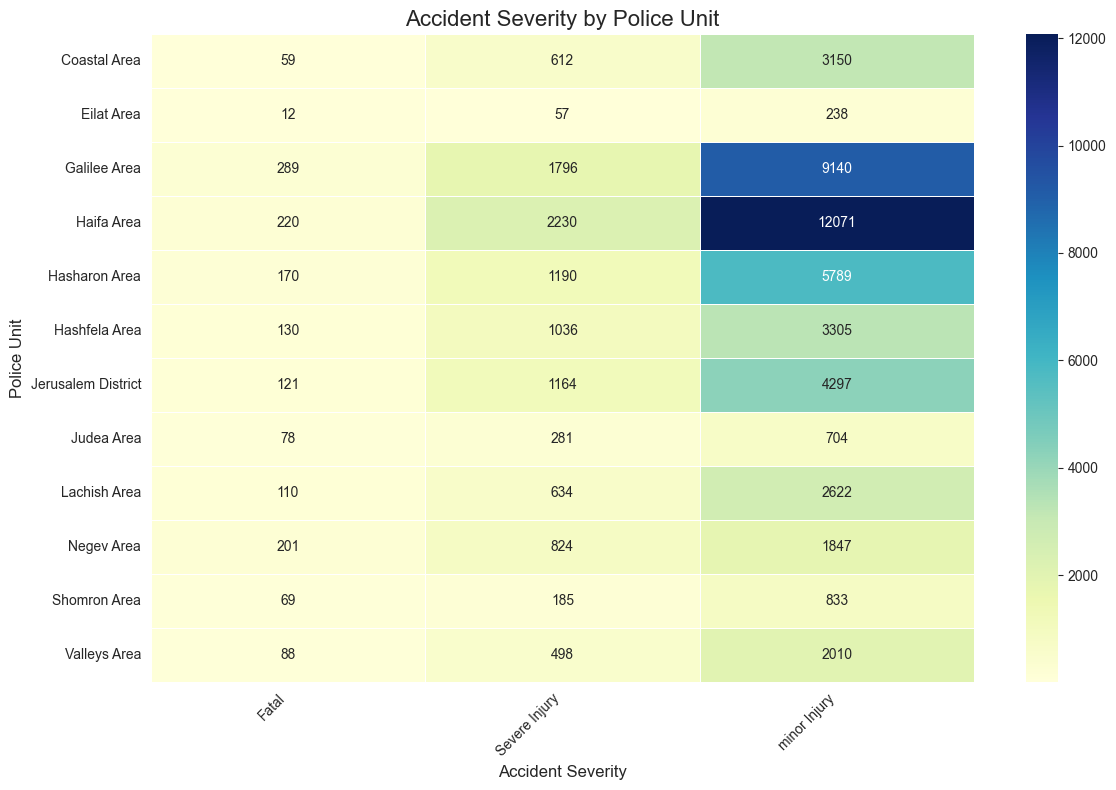

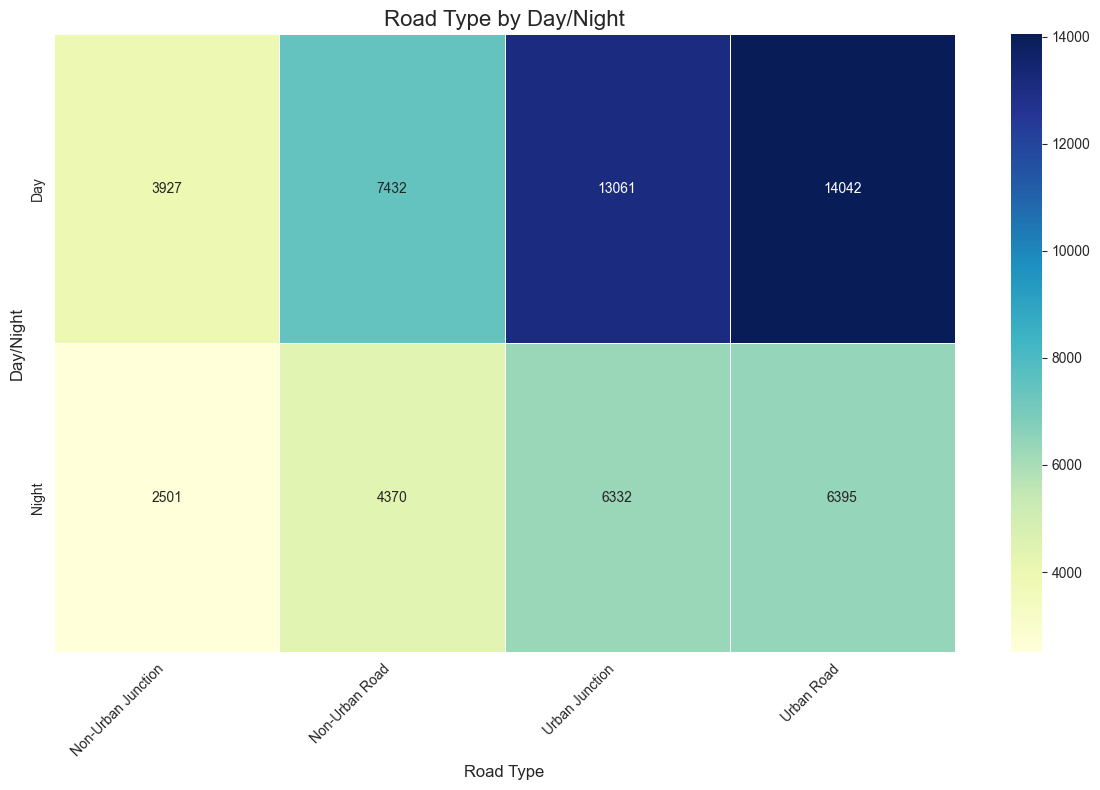

In [29]:

# Feature mappings for readability
road_type_mapping = {
    1: "Urban Junction", 2: "Urban Road", 3: "Non-Urban Junction",
    4: "Non-Urban Road",
}

severity_mapping = {
    1: "Fatal", 2: "Severe Injury", 3: "minor Injury",
}

weather_mapping = {
    1: "Clear", 2: "Rain", 3: "Hot", 4: "Fog",
    5: "Other", 9: "Unknown"
}

accident_type_mapping = {
    1: "Pedestrian Collision",
    2: "Head-Side Collision",
    3: "Head-Rear Collision",
    4: "Side-Side Collision",
    5: "Head-Head Collision",
    6: "Stopped Vehicle Collision (non parking)",
    7: "Stopped Vehicle Collision (parking)",
    8: "Self Collision",
    9: "Off-Road Collision",
    10: "Rollover Collision",
    11: "Slip",
    12: "Impact Inside Vehicle",
    13: "Fall in Vehicle",
    14: "Fire",
    15: "Other",
    17: "Rear-End Collision with Animal",
    18: "Side Collision with Animal",
    19: "Collision with Livestock",
    20: "Impact with Trailer"
}
day_night_mapping = {
    1: "Day", 5: "Night"
}
day_type_mapping = {
    1: "Holiday", 2: "Holiday Eve", 3: "Intermediate Days", 4: "Other Day"
}
road_surface_mapping = {
    1: "Dry",
    2: "Wet",
    3: "Covered with Fuel/Diesel",
    4: "Covered with Mud",
    5: "Sand or Gravel on Road",
    6: "Other",
    9: "Unknown"
}
# Combine mappings into a single structure
feature_mappings = {
    'YOM_BASHAVUA': day_mapping,
    'SUG_DEREH': road_type_mapping,
    'HUMRAT_TEUNA': severity_mapping,
    'MEZEG_AVIR': weather_mapping,
    'SUG_TEUNA': accident_type_mapping,
    'YEHIDA' : yehida_mapping,
    'YOM_LAYLA' : day_night_mapping,
    'SUG_YOM' : day_type_mapping,
    'PNE_KVISH' : road_surface_mapping
}

# Function to apply mappings to a dataset
def apply_feature_mappings(data, mappings):
    for feature, mapping in mappings.items():
        if feature in data.columns:
            data[feature] = data[feature].map(mapping)
    return data

# Function to generate heatmaps for given feature pairs
def generate_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y]].dropna()

    # Create a pivot table
    pivot_table = heatmap_data.groupby([feature_x, feature_y]).size().unstack(fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Feature pairs for heatmap generation
feature_pairs = [
    ('YOM_BASHAVUA', 'HUMRAT_TEUNA', "Accident Severity by Day of the Week", "Day of the Week", "Severity"),
    ('SUG_YOM', 'MEZEG_AVIR', "Weather Conditions by Type of Day", "Type of Day", "Weather Conditions"),
    ('SUG_TEUNA', 'SUG_DEREH', "Type of Accident by Road Type", "Type of Accident", "Road Type"),
    ('YOM_BASHAVUA', 'SUG_DEREH', "Road Type Usage by Day of the Week", "Day of the Week", "Road Type"),
    ('SUG_DEREH', 'HUMRAT_TEUNA', "Accident Severity by Road Type", "Road Type", "Accident Severity"),
    ('SHAA','YOM_BASHAVUA', "Hour of the Day by Day of the Week","Hour of the Day", "Day of the Week"),
    ( 'SUG_TEUNA','MEZEG_AVIR', "Accident Type by Weather Conditions", "Accident Type", "Weather Conditions"),
    ('PNE_KVISH', 'HUMRAT_TEUNA', "Accident Severity by Road Surface Condition", "Road Surface Condition", "Accident Severity"),
    ('YEHIDA', 'HUMRAT_TEUNA', "Accident Severity by Police Unit", "Police Unit", "Accident Severity"),
    ('YOM_LAYLA', 'SUG_DEREH', "Road Type by Day/Night", "Day/Night", "Road Type"),
]

# Initialize a list to hold all data
all_years_data = []

# Iterate through file paths and load each dataset
for year, path in file_paths.items():
    try:
        # Load dataset
        data = pd.read_csv(path)
        # Add a 'Year' column
        data['Year'] = year
        # Append to the list
        all_years_data.append(data)
    except FileNotFoundError:
        print(f"File for {year} not found at path: {path}")
        continue

# Combine all datasets into a single DataFrame
combined_data = pd.concat(all_years_data, ignore_index=True)

# Apply mappings to the combined dataset
combined_data_mapped = apply_feature_mappings(combined_data, feature_mappings)

# Generate heatmaps for combined data
for feature_x, feature_y, title, x_label, y_label in feature_pairs:
    generate_heatmap(combined_data_mapped, feature_x, feature_y, title, y_label, x_label)

### **Normalized Accident Heatmap by Day and Road Type**

This script applies **day weights** based on average traffic volumes to normalize accident occurrences. It then generates a **heatmap** that visualizes the distribution of accidents across **days of the week** and **road types**, reflecting the relative risk adjusted for traffic patterns.

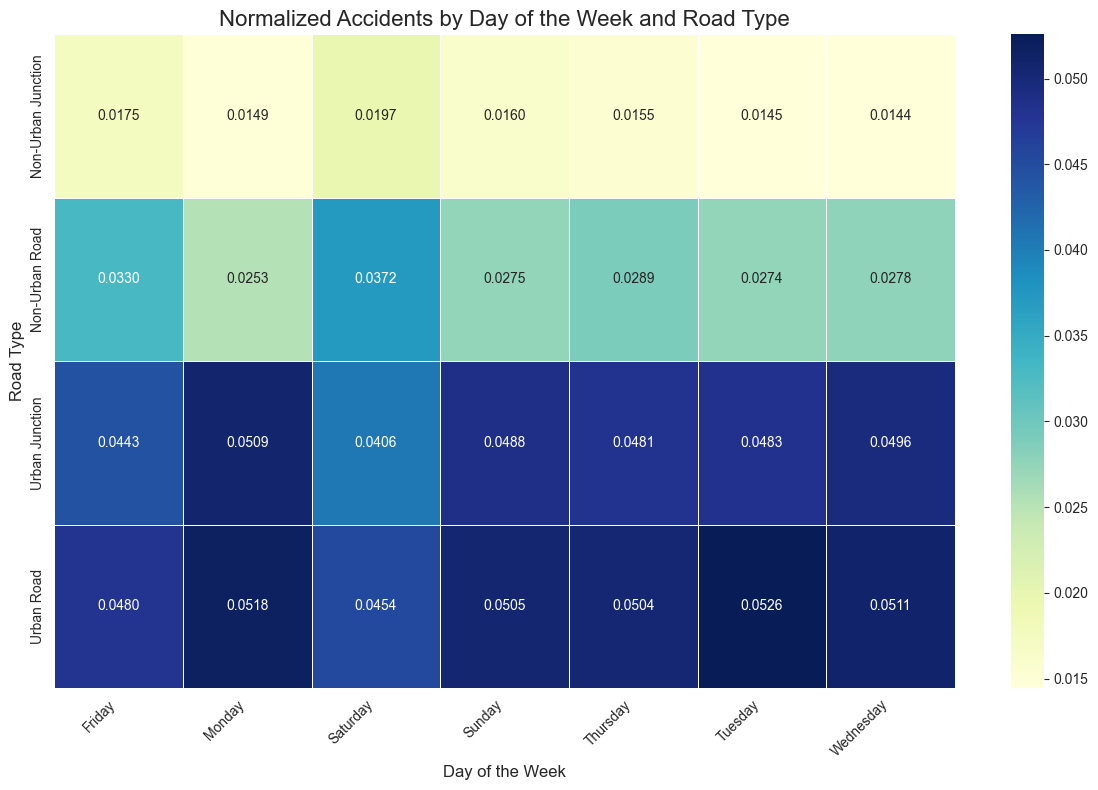

In [35]:
# Day weights based on average traffic volumes
day_weights = {
    "Sunday": 15.6,
    "Monday": 15.4,
    "Tuesday": 15.4,
    "Wednesday": 15.4,
    "Thursday": 15.4,
    "Friday": 11.8,
    "Saturday": 9.9
}

# Function to apply mappings to a dataset
def apply_feature_mappings_by_column(data, mapping, column_name):
    if column_name in data.columns:
        data[column_name] = data[column_name].map(mapping)
    return data

# Function to normalize accidents based on day weights
def normalize_accidents(data, day_column, weights):
    data['Traffic_Weight'] = data[day_column].map(weights)
    data['Normalized_Accidents'] = data.groupby(day_column)['Traffic_Weight'].transform(lambda x: x / x.sum())
    # Normalize values to [0, 1]
    total_sum = data['Normalized_Accidents'].sum()
    data['Normalized_Accidents'] = data['Normalized_Accidents'] / total_sum
    return data

# Function to generate heatmaps for given feature pairs
def generate_normalized_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y, 'Normalized_Accidents']].dropna()

    # Create a pivot table
    pivot_table = heatmap_data.pivot_table(
        index=feature_y,
        columns=feature_x,
        values='Normalized_Accidents',
        aggfunc='sum',
        fill_value=0
    )

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Combine all datasets into a single DataFrame
combined_data = pd.concat(all_years_data, ignore_index=True)

# Apply mappings to the combined dataset
combined_data = apply_feature_mappings_by_column(combined_data, day_mapping, 'YOM_BASHAVUA')
combined_data = apply_feature_mappings_by_column(combined_data, road_type_mapping, 'SUG_DEREH')

# Normalize accidents based on day weights
combined_data = normalize_accidents(combined_data, 'YOM_BASHAVUA', day_weights)

# Generate heatmap for normalized accidents by day of the week and road type
generate_normalized_heatmap(
    combined_data,
    feature_x='YOM_BASHAVUA',
    feature_y='SUG_DEREH',
    title="Normalized Accidents by Day of the Week and Road Type",
    x_label="Day of the Week",
    y_label="Road Type")


### **Normalized Accident Heatmap by Day/Night and Road Type**

This script normalizes accident counts based on **traffic volumes during Day and Night**, applying weights to adjust for expected traffic differences. It then visualizes the distribution across **road types** using a **heatmap**, highlighting relative accident risk during different times of the day.

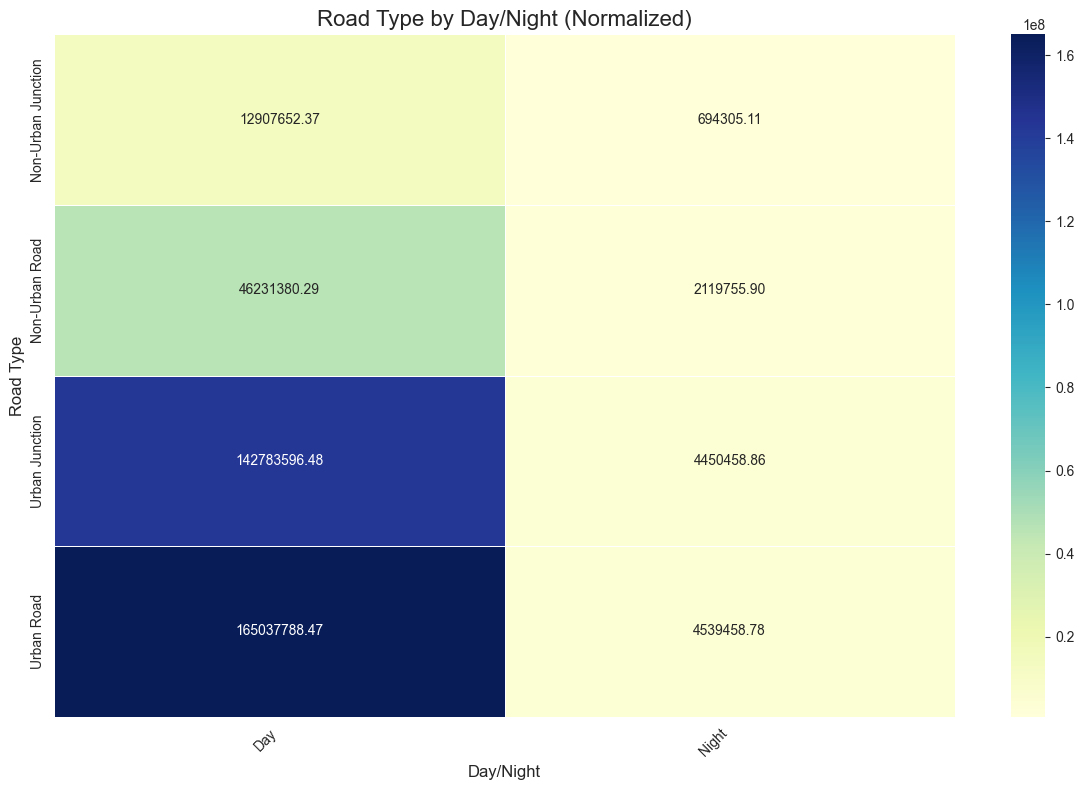

In [11]:
# Normalize data based on traffic volumes for Day and Night
def normalize_by_traffic(data, day_percentage, night_percentage):
    # Add a weight column based on 'YOM_LAYLA' (Day/Night)
    data['Traffic_Weight'] = data['YOM_LAYLA'].map({
        "Day": day_percentage / 100,
        "Night": night_percentage / 100
    })
    # Normalize the data based on the traffic weight
    data['Normalized_Count'] = data['Traffic_Weight'] * data.groupby(['YOM_LAYLA', 'SUG_DEREH'])['YOM_LAYLA'].transform('count')
    return data

# Apply normalization to the combined dataset
day_percentage = 83.7
night_percentage = 11.1
combined_data_mapped = normalize_by_traffic(combined_data_mapped, day_percentage, night_percentage)

# Update heatmap function to use normalized data
def generate_normalized_heatmap(data, feature_x, feature_y, title, x_label, y_label, figsize=(12, 8)):
    # Filter relevant columns and drop missing values
    heatmap_data = data[[feature_x, feature_y, 'Normalized_Count']].dropna()

    # Create a pivot table with normalized counts
    pivot_table = heatmap_data.pivot_table(
        index=feature_y,
        columns=feature_x,
        values='Normalized_Count',
        aggfunc='sum',
        fill_value=0
    )

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Generate heatmap with normalized data
generate_normalized_heatmap(combined_data_mapped, 'YOM_LAYLA', 'SUG_DEREH',
                            "Road Type by Day/Night (Normalized)", "Day/Night", "Road Type")

### **Normalized Accident Heatmap by Hour and Day of the Week**

This script normalizes accident counts based on the **driver distribution across hours of the day**, adjusting for typical traffic volume during each hour. It then generates a **heatmap** to visualize the relationship between **hour of the day** and **day of the week**, highlighting periods with higher accident risks.

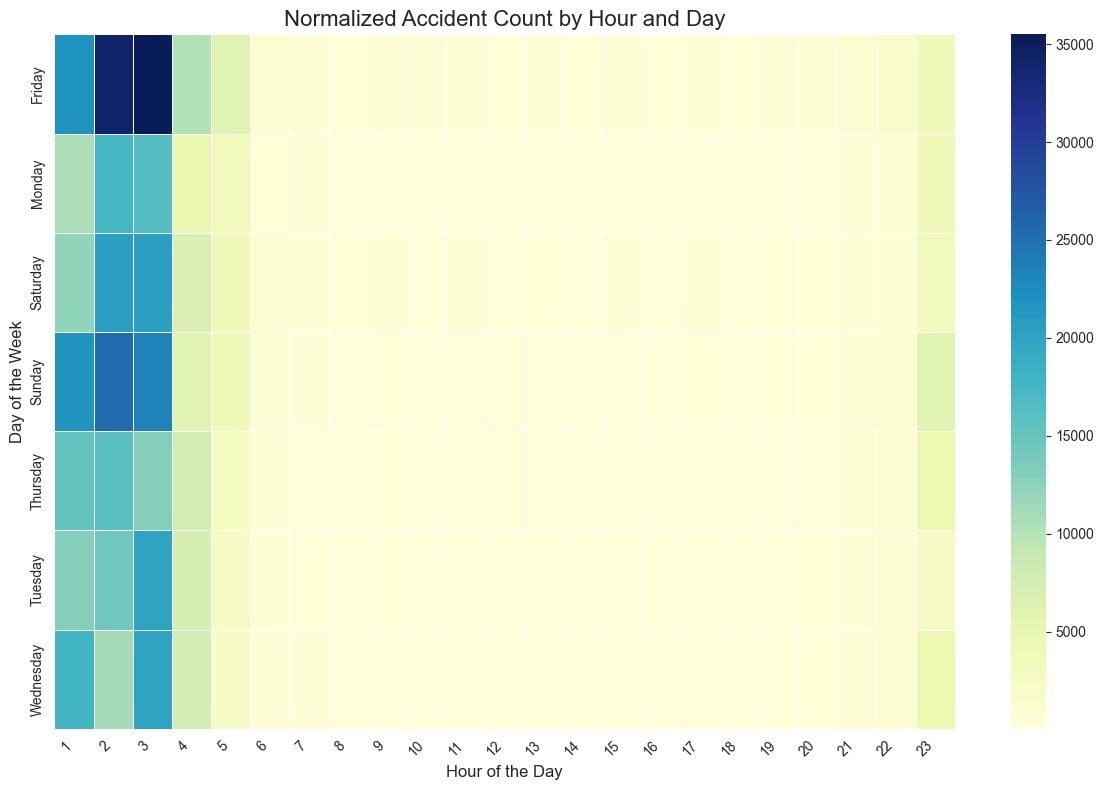

In [12]:
# Driver distribution based on provided data
driver_distribution = {
    0: 0.005, 1: 0.003, 2: 0.002, 3: 0.002, 4: 0.004, 5: 0.012, 6: 0.03,
    7: 0.06, 8: 0.07, 9: 0.065, 10: 0.065, 11: 0.065, 12: 0.065, 13: 0.065,
    14: 0.065, 15: 0.065, 16: 0.065, 17: 0.065, 18: 0.06, 19: 0.05, 20: 0.035,
    21: 0.025, 22: 0.015, 23: 0.008
}

# Normalize accident counts based on driver distribution
def normalize_by_driver_distribution(data, hour_column, distribution):
    data = data.copy()

    # Ensure hour column is numeric
    data[hour_column] = pd.to_numeric(data[hour_column], errors='coerce').fillna(-1).astype(int)

    # Filter valid hours and calculate normalization factor
    data = data[data[hour_column].between(0, 23)]
    data['Normalization_Factor'] = data[hour_column].map(distribution)

    # Normalize accident counts
    data['Normalized_Count'] = data['Normalization_Factor'].apply(lambda x: 1 / x if x > 0 else 0)
    return data

# Function to generate normalized heatmap for "Hour of the Day by Day of the Week"
def generate_normalized_hour_day_heatmap(data, hour_column, day_column, title, x_label, y_label, figsize=(12, 8)):
    # Normalize data by driver distribution
    data = normalize_by_driver_distribution(data, hour_column, driver_distribution)

    # Create a pivot table
    pivot_table = data.groupby([day_column, hour_column])['Normalized_Count'].sum().unstack(fill_value=0)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(pivot_table, annot=False, cmap="YlGnBu", linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Only generate the normalized heatmap for "Hour of the Day by Day of the Week"
generate_normalized_hour_day_heatmap(
    combined_data_mapped,
    hour_column='SHAA',        # Hour of the day
    day_column='YOM_BASHAVUA',  # Day of the week
    title="Normalized Accident Count by Hour and Day",
    x_label="Hour of the Day",
    y_label="Day of the Week"
)


The code creates a heatmap to visualize the number of accidents across different months and police units.

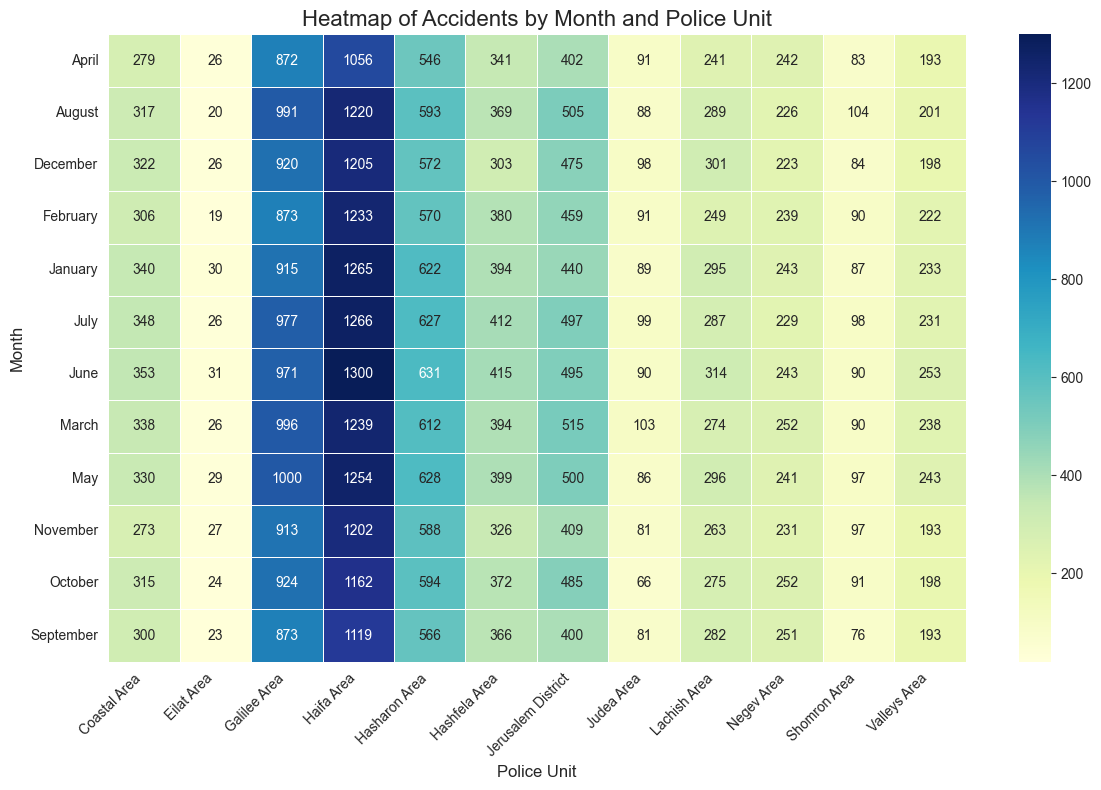

In [36]:
# Mapping for months (HODESH_TEUNA)
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

# Filter relevant columns
heatmap_data = combined_data[['HODESH_TEUNA', 'YEHIDA']].dropna()

# Map the values to their names
heatmap_data['HODESH_TEUNA'] = heatmap_data['HODESH_TEUNA'].map(month_mapping)
heatmap_data['YEHIDA'] = heatmap_data['YEHIDA'].map(yehida_mapping)

# Create a pivot table for the heatmap
pivot_table = heatmap_data.groupby(['HODESH_TEUNA', 'YEHIDA']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Accidents by Month and Police Unit", fontsize=16)
plt.xlabel("Police Unit", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


# Accident Rates by Driver Age Group (2017)
visualizing accident rates per 10,000 drivers for different age groups, distinguishing between "Serious Accidents" and "Fatal Accidents" using a grouped bar chart.

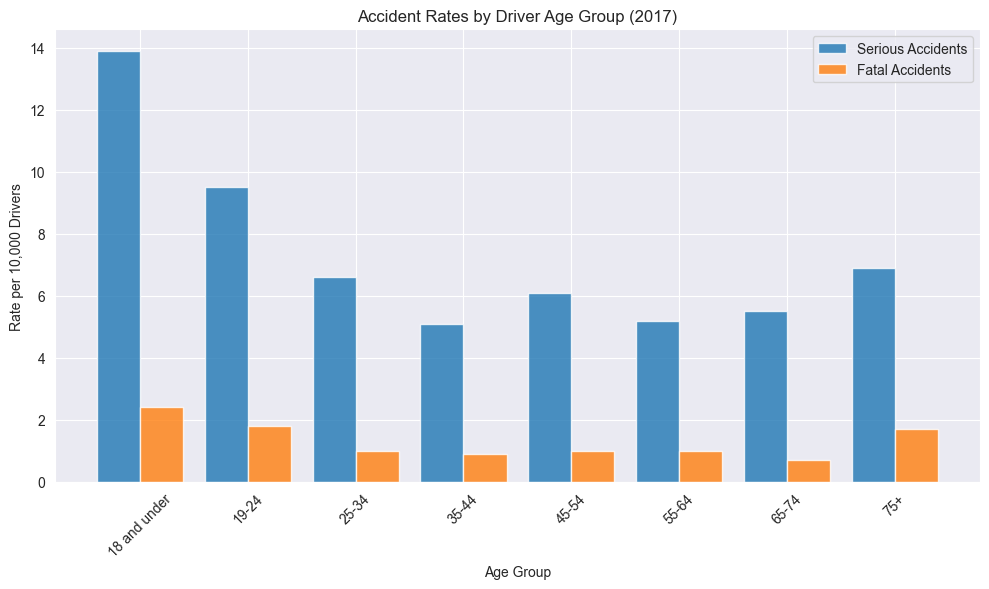

In [49]:
# Data from the graph
data = {
    "Age Group": ["18 and under", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"],
    "Serious Accidents": [13.9, 9.5, 6.6, 5.1, 6.1, 5.2, 5.5, 6.9],
    "Fatal Accidents": [2.4, 1.8, 1.0, 0.9, 1.0, 1.0, 0.7, 1.7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.4
age_indices = range(len(df["Age Group"]))

plt.bar(age_indices, df["Serious Accidents"], width=bar_width, label="Serious Accidents", alpha=0.8)
plt.bar([i + bar_width for i in age_indices], df["Fatal Accidents"], width=bar_width, label="Fatal Accidents", alpha=0.8)

# Add labels and legend
plt.xlabel("Age Group")
plt.ylabel("Rate per 10,000 Drivers")
plt.title("Accident Rates by Driver Age Group (2017)")
plt.xticks([i + bar_width / 2 for i in age_indices], df["Age Group"], rotation=45)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


# Traffic Violations in Serious and Fatal Accidents (2023)
visualizing the percentage distribution of traffic violations contributing to serious and fatal accidents in 2023

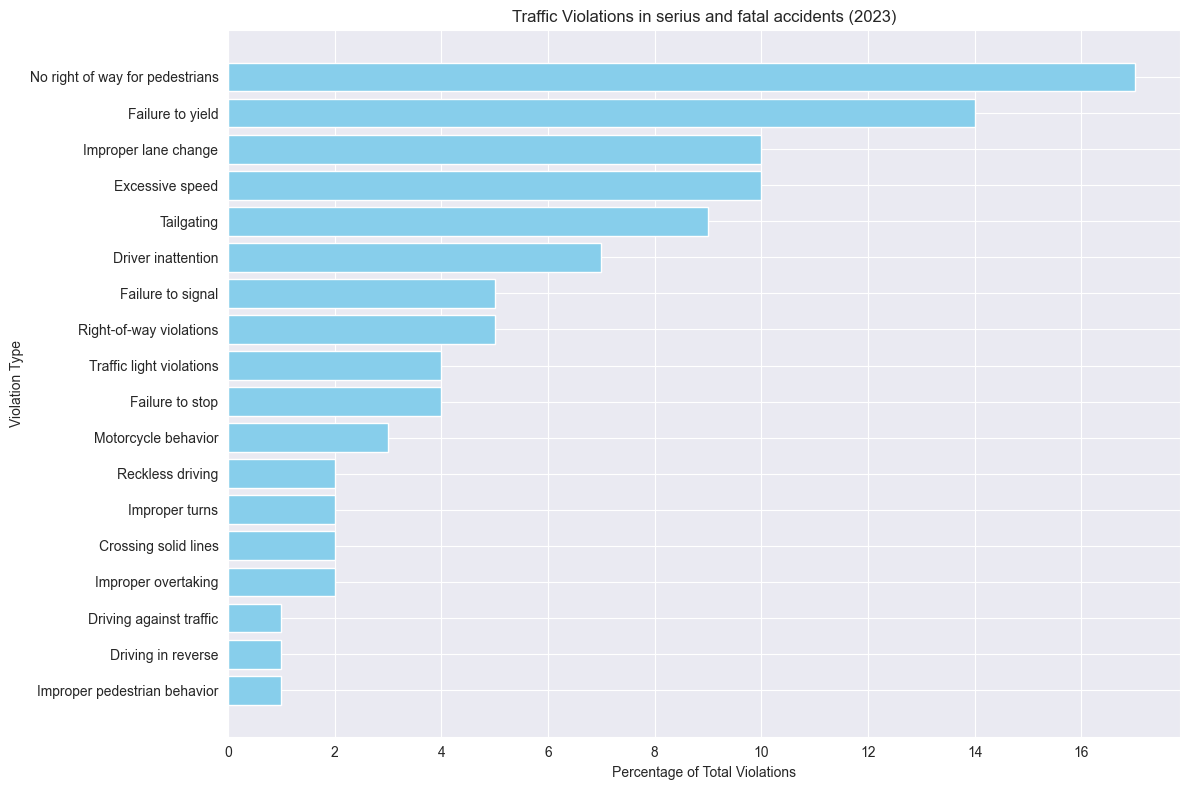

In [14]:
# Data manually interpreted from the table
data_table = {
    "Violation Type": [
        "No right of way for pedestrians", "Failure to yield",
        "Improper lane change", "Excessive speed",
        "Tailgating", "Driver inattention",
        "Failure to signal", "Right-of-way violations",
        "Traffic light violations", "Failure to stop",
        "Motorcycle behavior", "Reckless driving",
        "Improper turns", "Crossing solid lines",
        "Improper overtaking", "Driving against traffic",
        "Driving in reverse", "Improper pedestrian behavior"
    ],
    "Percentage": [
        17, 14, 10, 10, 9, 7, 5, 5,
        4, 4, 3, 2, 2, 2, 2, 1, 1, 1
    ]
}

# Create a DataFrame
df_table = pd.DataFrame(data_table)

# Plot the normalized distribution
plt.figure(figsize=(12, 8))
plt.barh(df_table["Violation Type"], df_table["Percentage"], color="skyblue")
plt.xlabel("Percentage of Total Violations")
plt.ylabel("Violation Type")
plt.title("Traffic Violations in serius and fatal accidents (2023)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the graph
plt.tight_layout()
plt.show()


# Risk Rate by City (2021)
visualizing the risk rate of accidents per 1,000 residents for various cities in 2021 using a horizontal bar chart

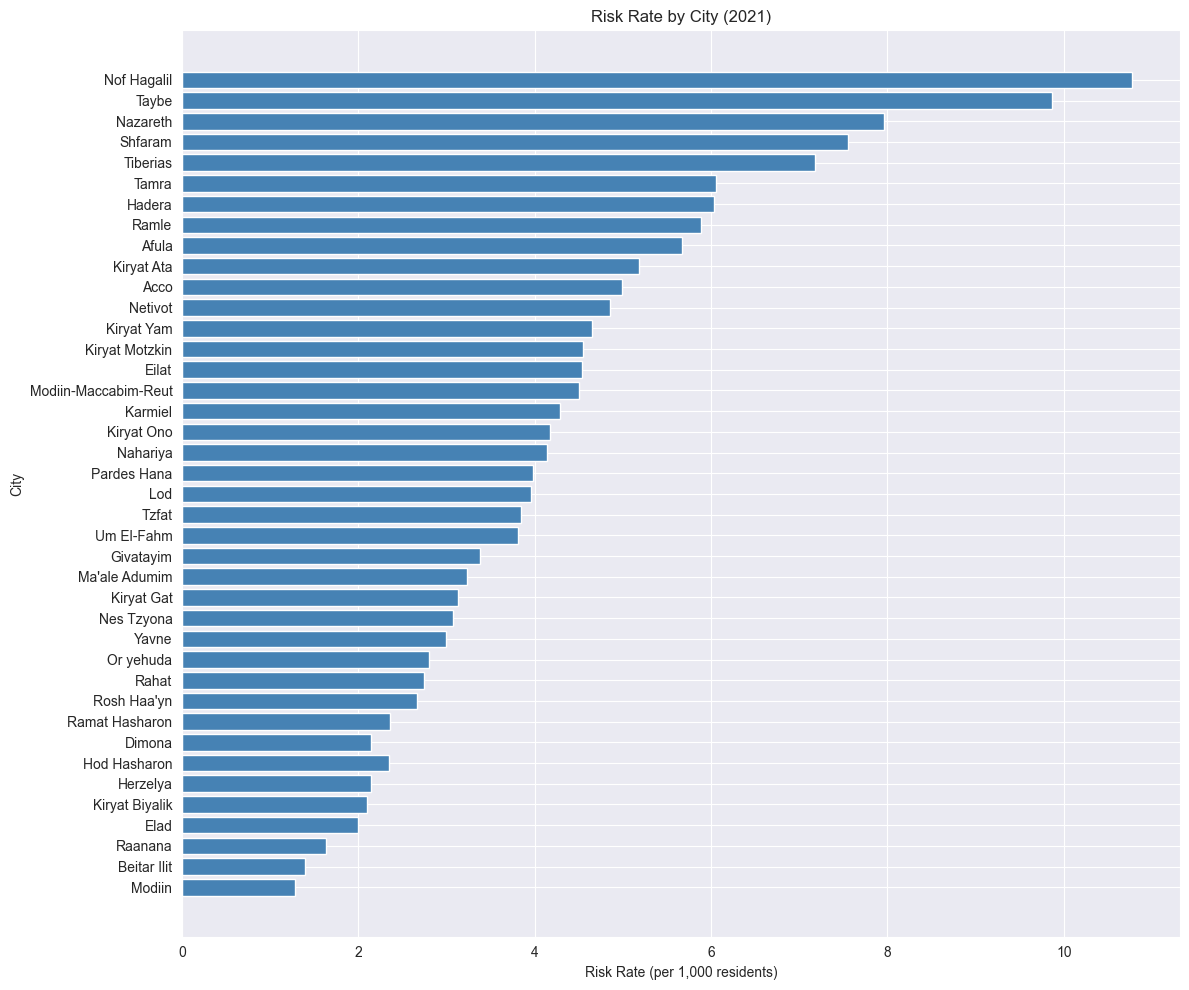

In [15]:
# Manually reconstructed data based on visual inspection of the chart
data_cities = {
    "City": [
        "Nof Hagalil", "Taybe", "Nazareth", "Shfaram", "Tiberias",
        "Tamra", "Hadera", "Ramle", "Afula", "Kiryat Ata",
        "Acco", "Netivot", "Kiryat Yam","Kiryat Motzkin", "Eilat",
        "Modiin-Maccabim-Reut", "Karmiel", "Kiryat Ono","Nahariya", "Pardes Hana",
        "Lod","Tzfat", "Um El-Fahm", "Givatayim", "Ma'ale Adumim", "Kiryat Gat","Nes Tzyona",
        "Yavne", "Or yehuda","Rahat","Rosh Haa'yn", "Ramat Hasharon","Dimona","Hod Hasharon", "Herzelya",
        "Kiryat Biyalik","Elad", "Raanana", "Beitar Ilit", "Modiin"],
    "Risk Rate (per 1,000)": [
        10.78, 9.87, 7.96, 7.55, 7.18, 6.06, 6.03, 5.88, 5.67,5.18, 4.99,
        4.85, 4.65, 4.55, 4.54, 4.50, 4.29, 4.17, 4.14, 3.98, 3.96,
        3.84,3.81, 3.38, 3.23, 3.13, 3.07, 2.99, 2.80,2.74, 2.66, 2.36, 2.14,2.35,
        2.14,2.10,1.99,1.63,1.39,1.28]
}

# Create a DataFrame
df_cities = pd.DataFrame(data_cities)

# Plot the normalized distribution
plt.figure(figsize=(12, 10))
plt.barh(df_cities["City"], df_cities["Risk Rate (per 1,000)"], color="steelblue")
plt.xlabel("Risk Rate (per 1,000 residents)")
plt.ylabel("City")
plt.title("Risk Rate by City (2021)")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the graph
plt.tight_layout()
plt.show()


# Severe and Fatal Accidents by Hour of the Day (Average 2013–2022)
This chart displays the number of accidents categorized by hours of the day. It highlights the distribution of severe and fatal accidents across different times, showing that most accidents occur during daytime hours.


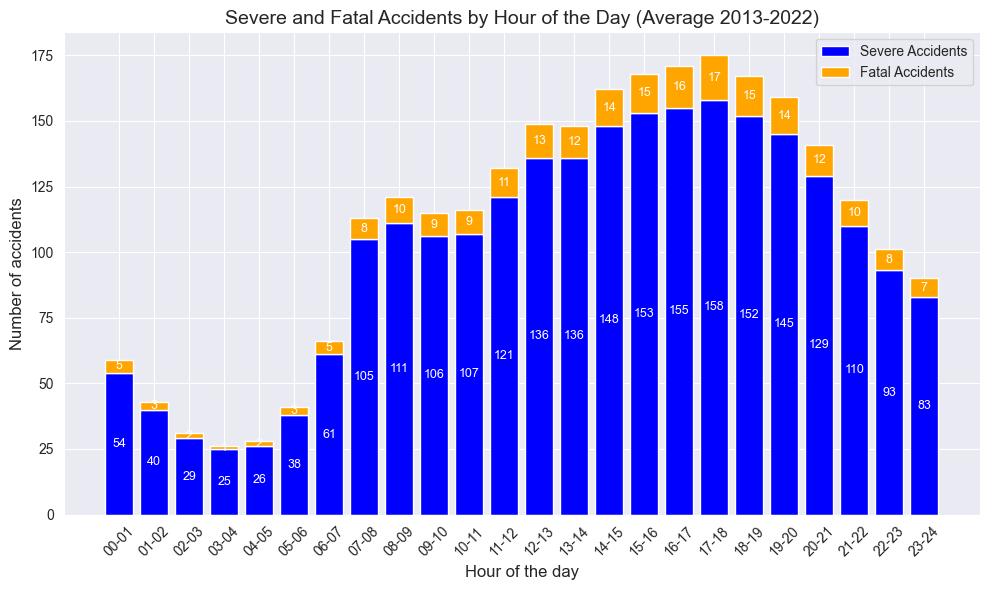

In [16]:
hours = [f"{i:02d}-{i+1:02d}" for i in range(24)]  # Hours of the day
severe_accidents = [54, 40, 29, 25, 26, 38, 61, 105, 111, 106, 107, 121, 136, 136, 148, 153, 155, 158, 152, 145, 129, 110, 93, 83]
fatal_accidents = [5, 3, 2, 1, 2, 3, 5, 8, 10, 9, 9, 11, 13, 12, 14, 15, 16, 17, 15, 14, 12, 10, 8, 7]

# Convert to NumPy arrays for easier stacking
severe_accidents = np.array(severe_accidents)
fatal_accidents = np.array(fatal_accidents)

# Plotting the data
plt.figure(figsize=(10, 6))
bar_width = 0.8
x = np.arange(len(hours))

# Stacked bar chart
plt.bar(x, severe_accidents, color='blue', label='Severe Accidents')
plt.bar(x, fatal_accidents, bottom=severe_accidents, color='orange', label='Fatal Accidents')

# Adding labels and title
plt.title("Severe and Fatal Accidents by Hour of the Day (Average 2013-2022)", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Number of accidents", fontsize=12)
plt.xticks(x, hours, rotation=45, fontsize=10)
plt.legend()

# Adding the numbers on top of the bars
for i, (severe, fatal) in enumerate(zip(severe_accidents, fatal_accidents)):
    plt.text(i, severe / 2, str(severe), ha='center', va='center', color='white', fontsize=9)
    if fatal > 0:
        plt.text(i, severe + fatal / 2, str(fatal), ha='center', va='center', color='white', fontsize=9)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


This dataset represents the normalized probability of being involved in a fatal crash on highways in the US,
segmented by age groups and gender (male and female). The probabilities are normalized to provide
relative comparisons across demographics.



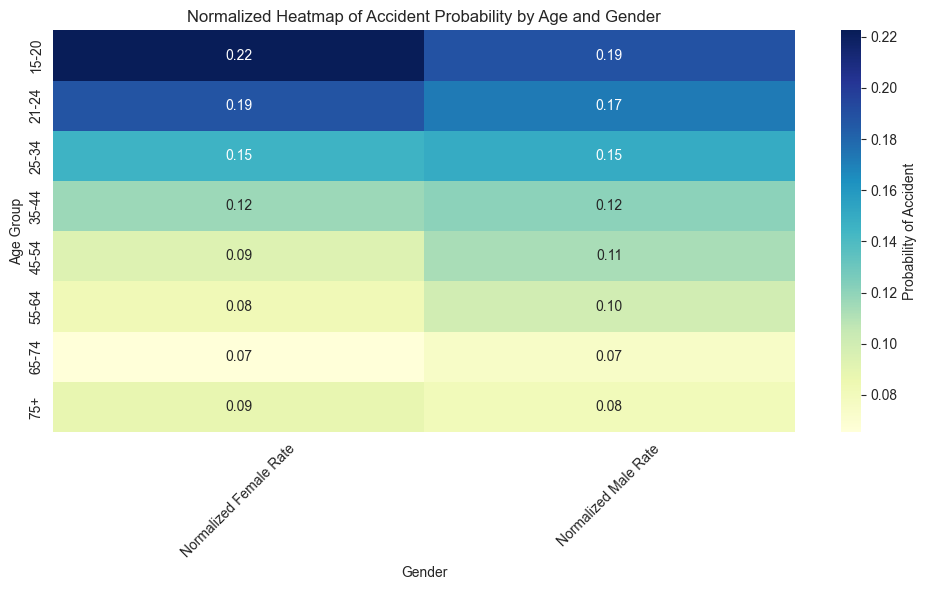

In [17]:
description = """
This dataset represents the normalized probability of being involved in a fatal crash on highways in the US,
segmented by age groups and gender (male and female). The probabilities are normalized to provide
relative comparisons across demographics.
"""

# Print the description
print(description)

# Data from the provided table
data = {
    "Age Group": ["15-20", "21-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"],
    "Normalized Male Rate": [0.188378632, 0.172758513, 0.1495314, 0.120899719, 0.113098659, 0.099653537, 0.074351765, 0.080912215],
    "Normalized Female Rate": [0.222513089, 0.187609075, 0.145724258, 0.116928447, 0.093386237, 0.082079232, 0.065445026, 0.088132635],
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars="Age Group", var_name="Gender", value_name="Accident Probability")

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df_melted.pivot(index="Age Group", columns="Gender", values="Accident Probability")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "Probability of Accident"})
plt.title("Normalized Heatmap of Accident Probability by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### **Normalized Accident Severity by Police Unit (Per 100,000 km Driven)**

This script processes city-level traffic data and maps each city to its respective **police unit**. It calculates the total **kilometers driven** for each police unit and merges it with accident severity statistics. Finally, the accident counts are **normalized per 100,000 kilometers driven** and visualized in a **heatmap**, highlighting accident severity distribution across different regions.

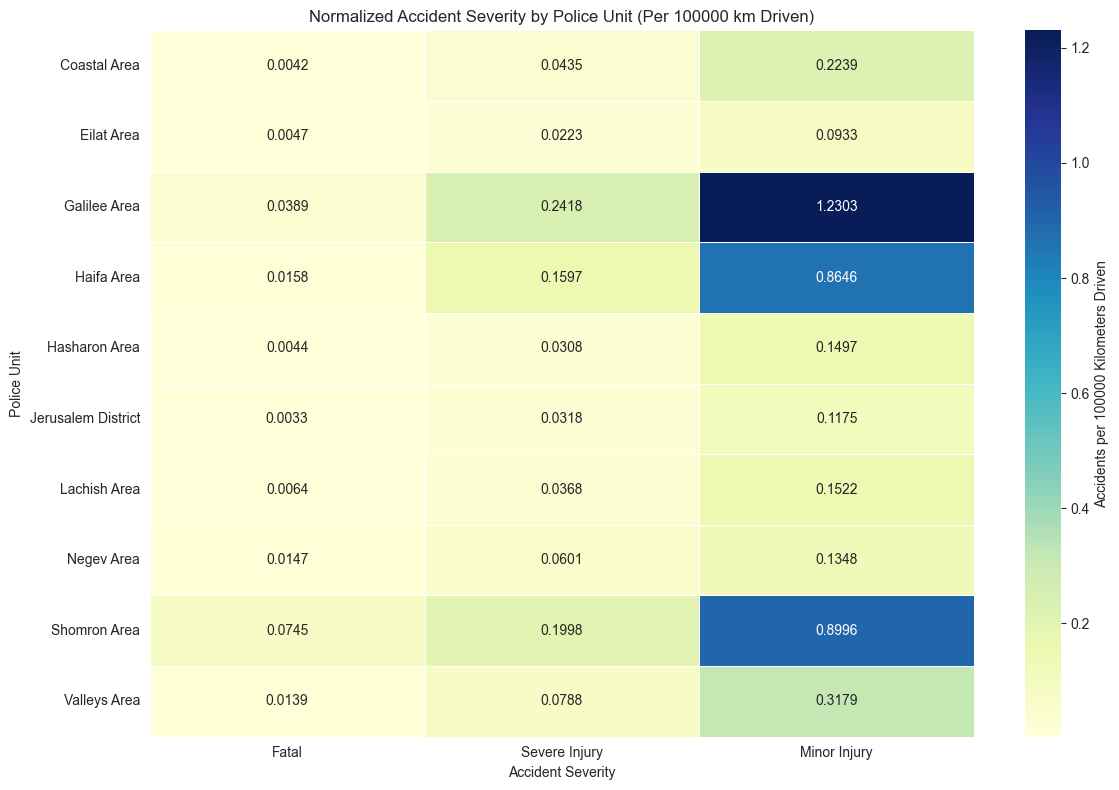

In [18]:
# Load the dataset
file_path = './Datasets/annual_drive_km_per_city.csv'

# Load and clean the dataset
city_data_cleaned = pd.read_csv(
    file_path,
    skiprows=14,  # Start at the row where actual data begins (Umm Al-Fahm onward)
    names=["City", "Annual_Kilometers_Travelled", "Licenced_to_Drive",
           "Privately_Owned_Vehicles", "Population", "Notes1", "Notes2"],
    usecols=["City", "Annual_Kilometers_Travelled", "Privately_Owned_Vehicles", "Population"]
)

# Drop any rows with NaN values in essential columns
city_data_cleaned = city_data_cleaned.dropna(subset=["City", "Annual_Kilometers_Travelled",
                                                     "Privately_Owned_Vehicles", "Population"])

# Convert numeric columns from strings to proper numeric types
city_data_cleaned["Annual_Kilometers_Travelled"] = pd.to_numeric(
    city_data_cleaned["Annual_Kilometers_Travelled"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Privately_Owned_Vehicles"] = pd.to_numeric(
    city_data_cleaned["Privately_Owned_Vehicles"].str.replace(",", "", regex=False), errors="coerce"
)
city_data_cleaned["Population"] = pd.to_numeric(
    city_data_cleaned["Population"].str.replace(",", "", regex=False), errors="coerce"
)

# Calculate kilometers driven per city
city_data_cleaned["Population_Calculated"] = city_data_cleaned["Population"] * 1000
city_data_cleaned["Vehicle_Ratio"] = city_data_cleaned["Privately_Owned_Vehicles"] / 1000
city_data_cleaned["Annual_Kilometers_Travelled_Calculated"] = city_data_cleaned["Annual_Kilometers_Travelled"] * 1000
city_data_cleaned["Kilometers_Driven"] = (
    city_data_cleaned["Population_Calculated"] * city_data_cleaned["Vehicle_Ratio"] * city_data_cleaned["Annual_Kilometers_Travelled_Calculated"]
)

# Map cities to police units
city_to_police_unit = {
    "Umm Al-Fahm": "Valleys Area",
    "Ofaqim": "Negev Area",
    "Or Yehuda": "Hasharon Area",
    "Or Aqiva": "Coastal Area",
    "Elat": "Eilat Area",
    "Elad": "Hasharon Area",
    "Ari'el": "Shomron Area",
    "Ashdod": "Lachish Area",
    "Ashqelon": "Lachish Area",
    "Baqa Al-Gharbiyya": "Valleys Area",
    "Be'er Sheva": "Negev Area",
    "Bet She'an": "Valleys Area",
    "Bet Shemesh": "Jerusalem District",
    "Betar Illit": "Jerusalem District",
    "Bene Beraq": "Hasharon Area",
    "Bat Yam": "Hasharon Area",
    "Giv'at Shemuel": "Hasharon Area",
    "Giv'atayim": "Hasharon Area",
    "Dimona": "Negev Area",
    "Hod HaSharon": "Hasharon Area",
    "Herzliyya": "Hasharon Area",
    "Hadera": "Coastal Area",
    "Holon": "Hasharon Area",
    "Haifa": "Haifa Area",
    "Tiberias": "Galilee Area",
    "Tayibe": "Coastal Area",
    "Tire": "Coastal Area",
    "Tirat Karmel": "Haifa Area",
    "Tamra": "Galilee Area",
    "Yavne": "Lachish Area",
    "Yehud": "Hasharon Area",
    "Yoqne'am Illit": "Haifa Area",
    "Jerusalem": "Jerusalem District",
    "Kefar Yona": "Hasharon Area",
    "Kefar Sava": "Hasharon Area",
    "Kafar Qasem": "Hasharon Area",
    "Karmi'el": "Galilee Area",
    "Lod": "Coastal Area",
    "Migdal HaEmeq": "Galilee Area",
}

# Add police unit information to the DataFrame
city_data_cleaned["Police Unit"] = city_data_cleaned["City"].map(city_to_police_unit)

# Calculate total kilometers driven per police unit
police_unit_km = city_data_cleaned.groupby("Police Unit")["Kilometers_Driven"].sum().reset_index()
police_unit_km.rename(columns={"Kilometers_Driven": "Total_Kilometers_Driven"}, inplace=True)

# Accident severity data
severity_data = {
    "Police Unit": [
        "Coastal Area", "Eilat Area", "Galilee Area", "Haifa Area", "Hasharon Area",
        "Jerusalem District", "Lachish Area", "Negev Area", "Shomron Area", "Valleys Area"
    ],
    "Fatal": [59, 12, 289, 220, 170, 121, 110, 201, 69, 88],
    "Severe Injury": [612, 57, 1796, 2230, 1190, 1164, 634, 824, 185, 498],
    "Minor Injury": [3150, 238, 9140, 12071, 5789, 4297, 2622, 1847, 833, 2010]
}
severity_df = pd.DataFrame(severity_data)

# Merge severity data with total kilometers driven
severity_with_km = severity_df.merge(police_unit_km, on="Police Unit")

# Normalize accidents by total kilometers driven (per 100 km)
for column in ["Fatal", "Severe Injury", "Minor Injury"]:
    severity_with_km[column] = (severity_with_km[column] / severity_with_km["Total_Kilometers_Driven"]) * 100000

# Drop the total kilometers column (no longer needed for visualization)
severity_with_km = severity_with_km.drop(columns=["Total_Kilometers_Driven"])

# Set Police Unit as the index for heatmap visualization
severity_with_km.set_index("Police Unit", inplace=True)

# Create a heatmap for accidents normalized by kilometers driven
plt.figure(figsize=(12, 8))
sns.heatmap(
    severity_with_km,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    fmt=".4f",
    cbar_kws={"label": "Accidents per 100000 Kilometers Driven"}
)
plt.title("Normalized Accident Severity by Police Unit (Per 100000 km Driven)")
plt.xlabel("Accident Severity")
plt.ylabel("Police Unit")
plt.tight_layout()
plt.show()

### **Normalized Scaled Weather Conditions by Type of Day**

This script normalizes the **frequency of weather conditions** across different **types of days** based on Israeli calendar ratios. It adjusts the original data against expected frequencies and scales the values to a **0-1 range**, highlighting relative weather impact for holidays, holiday eves, intermediate days, and regular days in a heatmap.

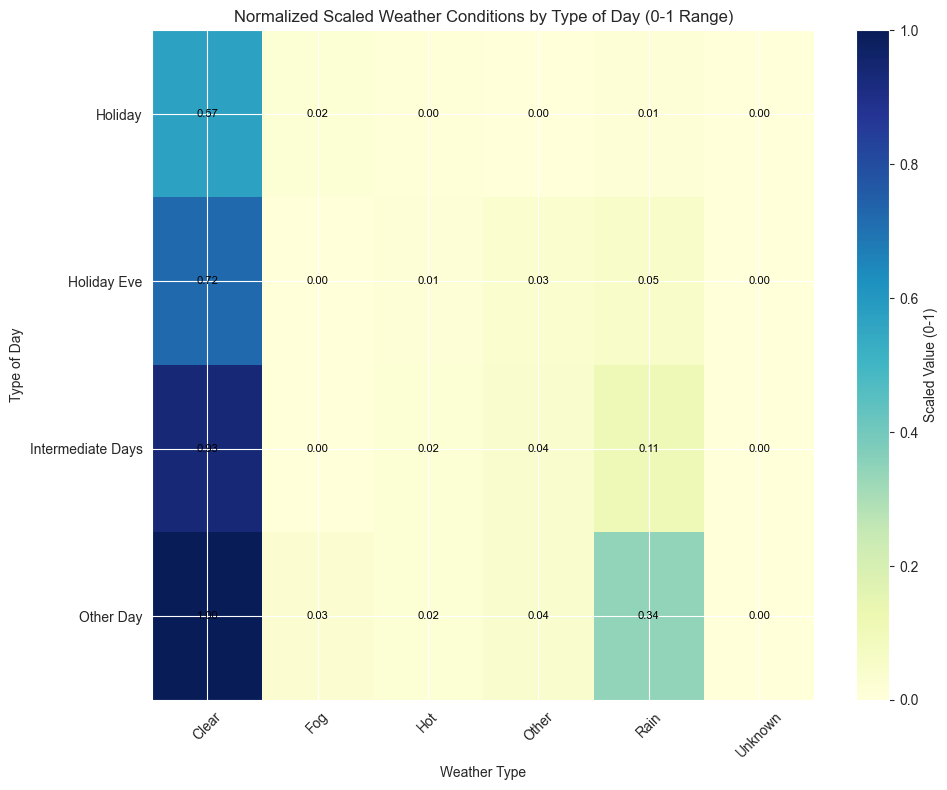

In [19]:
# Define the ratios based on the Israeli calendar
ratios = {
    "Holiday": 0.03,
    "Holiday Eve": 0.03,
    "Intermediate Days": 0.025,
    "Other Day": 0.915
}

# Map weather categories to the provided normalized values
weather_normalized = {
    "Clear": 0.68,  # Sunny
    "Fog": 0.026667,  # Other (Hamsin/Fog)
    "Hot": 0.194667,  # Partly Cloudy
    "Other": 0.026667,  # Similar to fog value
    "Rain": 0.098667,  # Rainy
    "Unknown": 0.0  # No information available
}

# Extract data from the original heatmap manually
original_data = {
    "Holiday": {"Clear": 858, "Fog": 1, "Hot": 2, "Other": 0, "Rain": 3, "Unknown": 95},
    "Holiday Eve": {"Clear": 1088, "Fog": 0, "Hot": 5, "Other": 2, "Rain": 11, "Unknown": 111},
    "Intermediate Days": {"Clear": 1177, "Fog": 0, "Hot": 7, "Other": 2, "Rain": 20, "Unknown": 158},
    "Other Day": {"Clear": 46131, "Fog": 56, "Hot": 230, "Other": 74, "Rain": 2285, "Unknown": 5744}
}

# Normalize the data using both weather and calendar ratios
day_types = ["Holiday", "Holiday Eve", "Intermediate Days", "Other Day"]
weather_types = ["Clear", "Fog", "Hot", "Other", "Rain", "Unknown"]

# Calculate the total frequency for each combination based on ratios
expected_frequencies = np.zeros((len(day_types), len(weather_types)))

for i, day_type in enumerate(day_types):
    for j, weather_type in enumerate(weather_types):
        # Expected frequency = Calendar ratio * Weather ratio
        calendar_ratio = ratios[day_type]
        weather_ratio = weather_normalized.get(weather_type, 0)
        expected_frequencies[i, j] = calendar_ratio * weather_ratio

# Adjust the original data to account for expected frequencies
adjusted_heatmap_matrix = np.zeros((len(day_types), len(weather_types)))

for i, day_type in enumerate(day_types):
    for j, weather_type in enumerate(weather_types):
        # Adjusted value = Raw count / Expected frequency (if frequency > 0)
        raw_count = original_data[day_type][weather_type]
        expected_frequency = expected_frequencies[i, j]
        adjusted_heatmap_matrix[i, j] = raw_count / expected_frequency if expected_frequency > 0 else 0

# Scale the adjusted heatmap matrix to a 0-1 range
scaled_heatmap_matrix = (adjusted_heatmap_matrix - np.min(adjusted_heatmap_matrix)) / (
    np.max(adjusted_heatmap_matrix) - np.min(adjusted_heatmap_matrix)
)

# Create the scaled heatmap
plt.figure(figsize=(10, 8))
plt.imshow(scaled_heatmap_matrix, cmap="YlGnBu", aspect="auto")

# Add numbers to the cells
for i in range(len(day_types)):
    for j in range(len(weather_types)):
        plt.text(j, i, f"{scaled_heatmap_matrix[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

# Add color bar and labels
plt.colorbar(label="Scaled Value (0-1)")
plt.xticks(ticks=range(len(weather_types)), labels=weather_types, rotation=45)
plt.yticks(ticks=range(len(day_types)), labels=day_types)
plt.title("Normalized Scaled Weather Conditions by Type of Day (0-1 Range)")
plt.xlabel("Weather Type")
plt.ylabel("Type of Day")
plt.tight_layout()
plt.show()

### **Accident Severity Distribution by Road Type**

This script visualizes the **normalized distribution of accident severity** across different **road types** using a heatmap. The data is scaled table-wise to highlight the relative frequency of **fatal**, **severe**, and **minor injuries** for both urban and non-urban roads.

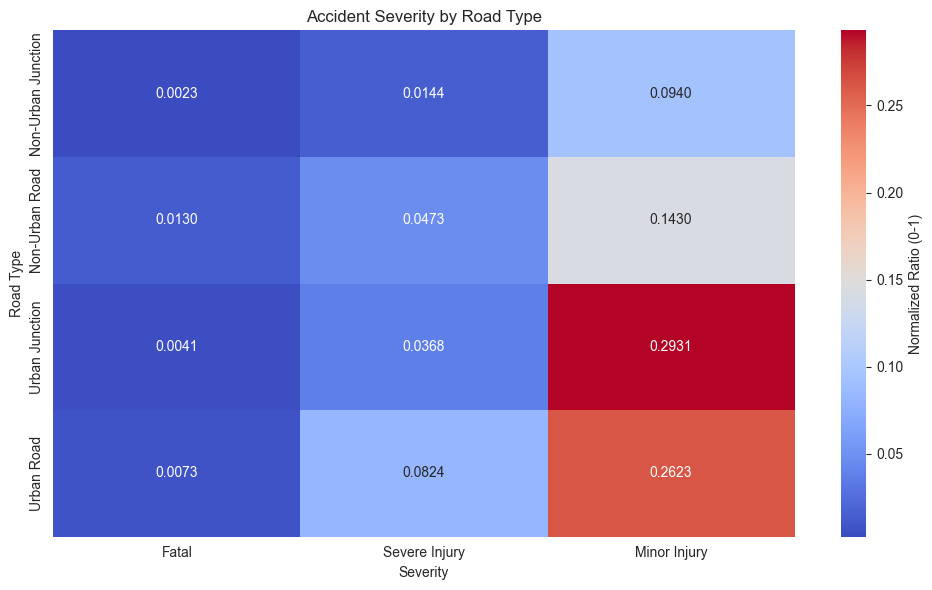

In [20]:
# Data extracted from the heatmap
data = {
    "Fatal": [135, 754, 236, 422],
    "Severe Injury": [836, 2745, 2139, 4787],
    "Minor Injury": [5457, 8303, 17018, 15228]
}
road_types = ["Non-Urban Junction", "Non-Urban Road", "Urban Junction", "Urban Road"]

# Create a DataFrame
df = pd.DataFrame(data, index=road_types)

#  Table-wise normalized values
df_ratios_table = df / df.values.sum()

# Plot table-wise normalized values
plt.figure(figsize=(10, 6))
sns.heatmap(df_ratios_table, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={'label': 'Normalized Ratio (0-1)'})
plt.title("Accident Severity by Road Type")
plt.xlabel("Severity")
plt.ylabel("Road Type")
plt.tight_layout()
plt.show()